# **Transaction Fraud Detection System**

#### ***A Project by Tanishqa Aggarwal, Shreevatsa Agnihotri and Dharmesh Sharma***

> # 🎬 **OPENING SCENE**
>
> ---
>
> **FADE IN:** *A coffee shop in Boston. 3:47 PM on a Tuesday.*
>
> Our protagonist: **Sarah**, sipping a latte, living her best life ☕
>
> ---
>
> *PHONE BUZZES* 🔔
>
> ---
>
> ### ⚠️ **NOTIFICATION**
>
> 💳 **$2,847 charge in Lagos, Nigeria**
>
> 📍 She's in Boston. She's never been to Nigeria.
>
> ---
>
> **CUT TO:** Sarah spitting out her latte
>
> **SARAH:** *"DID THE CAPITAL LETTERS JUST GET BIGGER?!"*
>
> *(They did. This is serious.)*
>
> ---


<div align="center">
  <img src="https://media1.tenor.com/m/L6DH2NVtXJwAAAAC/spit-out-my-coffee-lisa-loud.gif" width="400" alt="Cute Shocked">
  <br>
  <em>Poor Sarah</em>
</div>

### **The Challenge: Security vs. Sanity**

The Numbers Don't Lie (But Fraudsters Do)
- 💰 $165 BILLION in projected fraud losses between 2023-2027 globally

- 😤 1 in 4 people have experienced payment fraud

- ⏱️ 24/7 - Fraudsters are always online (they don't have a 9-5 job)

- 🛑 FALSE POSITIVES - Legit customers getting blocked feels WORSE than getting hacked.

Think about it: You're at the grocery store. You try to pay. DECLINED 🚫. You just got Sarah'd. And now you're embarrassed. And angry. And hungry.



### **What are we doing in this notebook?**  
We are stepping into the shoes of a fraud analytics team at a digital payments company.  
Our mission: **Spot suspicious transactions fast enough that people like Sarah never lose a dollar.**  

Think of this notebook as a mix of:
- a **crime investigation story** 🔍  
- a **data science lab** 🧪  
- and a **model-building workshop** 🤖  

Along the way, we will:
- get to know our **cast of characters** (features, devices, email domains, cards)  
- interrogate suspicious behavior through **EDA**  
- and train models to **separate legit from fraud** with as little confusion as possible.


<div align="center">
  <img src="https://media1.tenor.com/m/8O5qrxeANZEAAAAC/on-the-case-search.gif" width="400" alt="Cute Shocked">
  <br>
  <em></em>
</div>

### **The Data Architecture**

To catch a thief, we need to look at the full picture. Our dataset is a relationship between two distinct stories linked by a `TransactionID`.

**1. The Paper Trail (Transaction Table)**

This is the "what" and the "where." It holds the details you'd expect on a receipt:
* **The Basics:** Product codes and card information (`card1 - card6`).
* **The User:** Email domains (`gmail.com`, etc.) and billing locations.
* **The Clock:** A time-delta (`TransactionDT`) that tells us *when* it happened relative to a start date.

**2. The Digital Fingerprint (Identity Table)**

This is the "who" (or "what machine"). It captures the hidden network details:
* **The Device:** Is it a phone? A desktop? What specific model? (`DeviceType`, `DeviceInfo`).
* **The Network:** Anonymized technical attributes that act like digital breadcrumbs.

**The Split**

We teach the model using a **Training Set** (where we already know who the fraudsters are) and then grade its performance on a **Test Set** (unseen data) to ensure it can handle the real world.

*Data Source: [IEEE-CIS Fraud Detection | Kaggle](https://www.kaggle.com/competitions/ieee-fraud-detection/data)*

### 🗺️ **Project Roadmap**

**PHASE 1: THE EVIDENCE (Data Ingestion)**
* [1. Importing the Toolkit](#1-importing-the-toolkit)
* [2. Loading the Raw Logs](#2-loading-the-raw-logs)
    * [2.1 Transaction & Identity Data](#21-transaction--identity-data)
    * [2.2 Creating the Master Dataset (Merge)](#22-creating-the-master-dataset-merge)

**PHASE 2: SANITIZING THE DATA (Preprocessing)**
* [3. Cleaning Strategy](#3-cleaning-strategy)
    * [3.1 Consistency Check (Duplicates)](#31-consistency-check-duplicates)
    * [3.2 Parsing Data Types](#32-parsing-data-types)
    * [3.3 Handling Missing Intelligence](#33-handling-missing-intelligence)
        * [3.3.1 Investigation](#331---investigation)
        * [3.3.2 Deletion Strategy](#332-deletion-strategy)
        * [3.3.3 Cleaning Strategy - Categorial Data](#333-cleaning-strategy---categorial-data)
        * [3.3.4 Imputation Strategy](#334-imputation-strategy)

**PHASE 3: THE INVESTIGATION (Exploratory Analysis)**
* [4. Exploratory Data Analysis: profiling the suspects](#4-exploratory-data-analysis-profiling-the-suspects)
    * [Method 1: Descriptive Statistics & Frequency Analysis](#method-1-descriptive-statistics--frequency-analysis)
    * [Method 2: Correlation Analysis](#method-2-correlation-analysis)
    * [Method 3: Hypothesis Testing & Outlier Analysis](#method-3-hypothesis-testing--outlier-analysis)

**PHASE 4: PREPARING THE CASE (Encoding)**
* [5. Feature Encoding & Train-Test Split](#5-feature-encoding--train-test-split)

**PHASE 5: THE PROOF OF CONCEPT (Baseline)**
* [6. Building the Basic Detector](#6-building-the-basic-detector)
    * [6.1 Logistic Regression (Raw Data)](#61-logistic-regression-raw-data)
    * [6.2 Performance Check: "Can we do better?"](#62-performance-check-can-we-do-better)

**PHASE 6: CALLING THE SPECIALISTS (Advanced Models)**
* [7. Model Comparison](#8-model-comparison)
    * [7.1 Random Forest Classifier](#81-random-forest-classifier)
    * [7.2 XGBoost: The Champion](#82-xgboost-the-champion)
    * [7.3 The Verdict: ROC-AUC Comparison](#83-the-verdict-roc-auc-comparison)

**PHASE 7: CLOSING THE CASE (Final Test)**
* [8. Evaluating Unseen Evidence](#9-evaluating-unseen-evidence)
    * [8.1 Processing Test Data](#91-processing-test-data)
    * [8.2 Generating the Final Submission](#92-generating-the-final-submission)
* [9. References & Resources](#10-references--resources)

## **1. Importing the Toolkit<a id="imports"></a>**

First, we need to gather our tools. We’re importing the standard data science stack to help us wrangle the raw data and visualize the hidden patterns inside.

###  Meet our toolbox

Before we interrogate any suspicious transaction, we need our investigation gear:

- `pandas` → our **data detective** reading CSV files and cleaning up the mess 🕵️‍♂️  
- `numpy` → the **math engine** handling numbers behind the scenes 🔢  
- `matplotlib` / `seaborn` → the **visual storytellers** turning patterns into plots 📊  
- `sklearn` → the **model workshop**, where we test algorithms and tune them like race cars 🏎️  

Once the toolkit is ready, we can invite the data into the lab.


In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 1.1 MB/s eta 0:00:00


In [ ]:
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
import os
import gc
import math
import numpy as np
import pandas as pd
from google.colab import drive

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# stats/tests
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve , precision_recall_curve , auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import xgboost as xgb

# settings
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)
RANDOM_STATE = 42


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


## **2. Loading the Raw Logs**

Time to bring in the evidence. We load the raw transaction and identity logs to begin looking for clues.

In [ ]:
# load files
tx_train_path = "/content/drive/MyDrive/602-Project/train_transaction.csv"
id_train_path = "/content/drive/MyDrive/602-Project/train_identity.csv"

print("Files exist:", os.path.exists(tx_train_path), os.path.exists(id_train_path))

Files exist: True True


#### **2.1 Transaction & Identity Data**

In [ ]:
df_tx_train = pd.read_csv(tx_train_path, low_memory=False)

df_tx_train.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
df_id_train = pd.read_csv(id_train_path, low_memory=False)

df_id_train.head(10)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,18.0,529.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,15.0,352.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,484.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [ ]:
print("Transaction shape:", df_tx_train.shape)
print("Identity shape:", df_id_train.shape)

Transaction shape: (590540, 394)
Identity shape: (144233, 41)


In [ ]:
print(df_tx_train['isFraud'].value_counts())

isFraud
0    569877
1     20663
Name: count, dtype: int64


### **👀 First glimpse at the fraud universe**

We have just loaded a **huge ledger of transactions**.  
Each row is a tiny moment in someone’s financial life: a coffee, a hotel booking, an online game purchase, or… a stolen card being abused.

When you see columns like:
- `TransactionDT`, `TransactionAmt` → **when** and **how much**
- `card1`–`card6` → a fuzzy description of the **card & cardholder**
- `addr1`, `addr2`, `dist1` → hints about **geography and distance**
- `P_emaildomain`, `R_emaildomain` → **who is paying** and possibly **who is receiving**
- `C1`–`C14`, `V1`–`V339` → anonymized signals from the bank’s internal systems

…you can imagine a **security control room** where each of these columns lights up when something feels off.

We will now start by asking a simple question:  
> *“What does a typical transaction look like? And how does a fraudulent one differ?”*


#### **2.2 Creating the Master Dataset (Merge)**

Context is everything in fraud detection. By merging the payment logs with device data, we link the action (the purchase) to the actor (the digital fingerprint) to reveal the full story.

In [ ]:
# Merge with identity table
df_merged_data = df_tx_train.merge(df_id_train, how="left", on="TransactionID")
print("Merged shape:", df_merged_data.shape)

Merged shape: (590540, 434)


## **3. Cleaning Strategy**

### 🧹 Cleaning the crime scene

Real-world transaction data is **messy**:
- Some fields are missing because the device never sent them.  
- Some values look strange because of **encoding**, **system quirks**, or **anonymization**.  
- Some features are extremely sparse and behave like static noise.

If we took this raw data and threw it straight into a model, it would be like trying to solve a case in a dark room with half the evidence smudged.

In this section, we:
- decide **what to keep** and **what to drop**,  
- make sure our data types behave,  
- and transform the table into something a model can actually learn from.

You can think of it as **prepping the evidence** before presenting it to a very picky judge: the classifier.


### **3.1 Consistency Check (Duplicates)**

Reliable forensic analysis requires unique evidence. We scan the logs for duplicate entries to ensure that every TransactionID represents a single, distinct event in the real world.

In [ ]:
print("Checking for Duplicates -")

# Checking the number of completely duplicated rows
duplicate_rows = df_merged_data.duplicated().sum()
print(f"Found {duplicate_rows} duplicated rows.")

if duplicate_rows > 0:
    df_merged_data = df_merged_data.drop_duplicates().reset_index(drop=True)

# Checking duplicated Transaction IDs (if any)
trx_id = df_merged_data['TransactionID'].nunique()
if trx_id != df_merged_data.shape[0]:
    print(f"Found {df_merged_data.shape[0] - trx_id} duplicated TransactionID.")
else:
    print("No duplicated TransactionID found.")

Checking for Duplicates -
Found 0 duplicated rows.
No duplicated TransactionID found.


In [ ]:
print("Initial Data Types and Non-Null Counts:")
df_merged_data.info()

Initial Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


### **3.2 Parsing Data Types**

Algorithms can mistake numerical IDs for values (e.g., thinking Device ID 5 is "greater" than Device ID 1). We fix this by enforcing categorical types, ensuring the model sees them as identifiers, not math.

In [ ]:
# (b) Parse - Fix Data Types
print("Parsing Categorical Columns -")

# All columns that are categorical, based on the data description
categorical_features = [
    'ProductCD', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'DeviceType', 'DeviceInfo',
]
categorical_features += [f'card{i}' for i in range(1, 7)]  # card1 - card6
categorical_features += [f'M{i}' for i in range(1, 10)]   # M1 - M9
categorical_features += [f'id_{i}' for i in range(12, 39)] # id_12 - id_38

cols_converted = []
for col in categorical_features:
    if col in df_merged_data.columns:
        df_merged_data[col] = df_merged_data[col].astype(str)
        cols_converted.append(col)

print(f"Converted {len(cols_converted)} columns to 'object' (string) type.")
print("\nCell 3 complete: Data types parsed.")

Parsing Categorical Columns -
Converted 49 columns to 'object' (string) type.

Cell 3 complete: Data types parsed.


In [ ]:
df_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(382), int64(3), object(49)
memory usage: 1.9+ GB


### **3.3 Handling Missing Intelligence**

With 434 features, we are dealing with a wide but potentially sparse dataset. Before we can fix the data, we need to measure the damage.

**The Obstacle:**
Many columns contain a high percentage of NaN values. Imputing (filling in) this many blanks would introduce too much noise into our investigation.

**The Strategy:**
We will perform a **sparsity check**. We are printing the top 50 worst offenders by missing percentage to decide where to draw the line between useful features and dead weight.

#### **3.3.1 - Investigation**

In [ ]:
# (Part 1: Investigation)
print("Investigating Missing Values -")

# Calculate missing value counts and percentages
missing_values = df_merged_data.isnull().sum()
missing_percent = (missing_values / len(df_merged_data)) * 100

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percent': missing_percent
})

# Sort to see the worst columns
missing_summary.sort_values(by='Missing Percent', ascending=False, inplace=True)

# Display the top 50 columns with the most missing data
print("Top 50 columns with the most missing values:")
print(missing_summary.head(50))

Investigating Missing Values -
Top 50 columns with the most missing values:
       Missing Count  Missing Percent
id_07         585385        99.127070
id_08         585385        99.127070
dist2         552913        93.628374
D7            551623        93.409930
D13           528588        89.509263
D14           528353        89.469469
D12           525823        89.041047
id_03         524216        88.768923
id_04         524216        88.768923
D6            517353        87.606767
id_09         515614        87.312290
D9            515614        87.312290
D8            515614        87.312290
id_10         515614        87.312290
V138          508595        86.123717
V153          508595        86.123717
V148          508595        86.123717
V154          508595        86.123717
V163          508595        86.123717
V139          508595        86.123717
V149          508595        86.123717
V142          508595        86.123717
V140          508595        86.123717
V141        

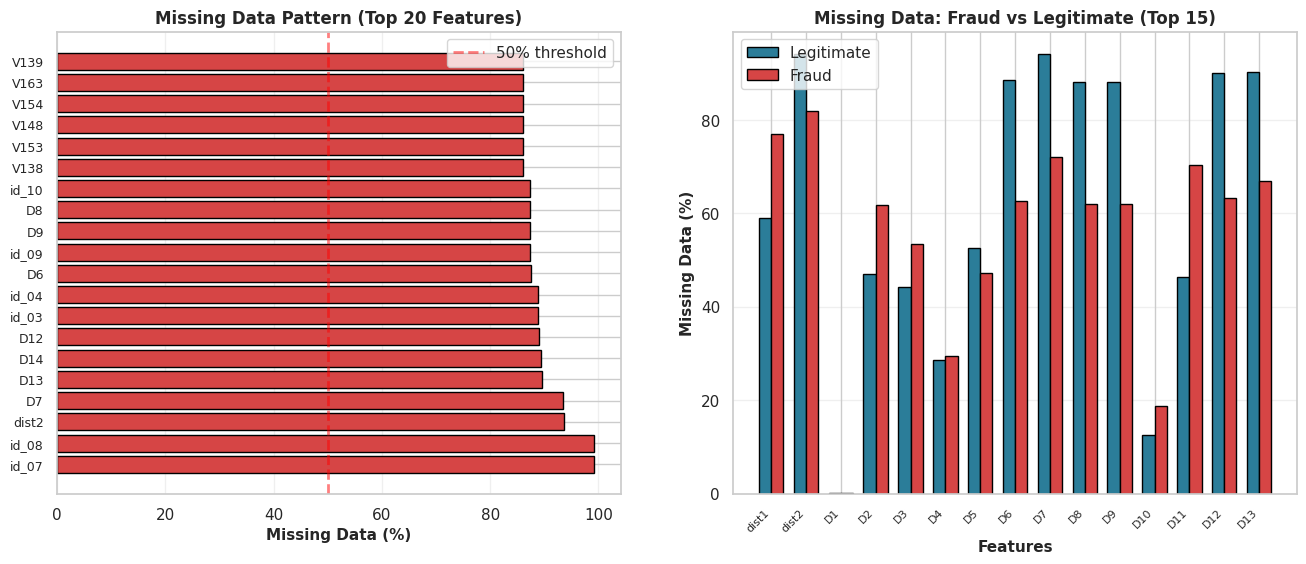

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Missing data percentage by column
ax1 = axes[0]
missing_pct = (df_merged_data.isnull().sum() / len(df_merged_data) * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0].head(20)
colors_missing = ['#d64545' if x > 50 else '#f4a261' if x > 20 else '#2b7d99' for x in missing_pct.values]
ax1.barh(range(len(missing_pct)), missing_pct.values, color=colors_missing, edgecolor='black')
ax1.set_yticks(range(len(missing_pct)))
ax1.set_yticklabels(missing_pct.index, fontsize=9)
ax1.set_xlabel('Missing Data (%)', fontsize=11, fontweight='bold')
ax1.set_title('Missing Data Pattern (Top 20 Features)', fontsize=12, fontweight='bold')
ax1.axvline(x=50, color='red', linestyle='--', linewidth=2, alpha=0.5, label='50% threshold')
ax1.grid(alpha=0.3, axis='x')
ax1.legend()

# Subplot 2: Missing data distribution by fraud status
ax2 = axes[1]
legit_missing = df_merged_data[df_merged_data['isFraud'] == 0].isnull().sum() / len(df_merged_data[df_merged_data['isFraud'] == 0]) * 100
fraud_missing = df_merged_data[df_merged_data['isFraud'] == 1].isnull().sum() / len(df_merged_data[df_merged_data['isFraud'] == 1]) * 100

missing_cols = (df_merged_data.isnull().sum() > 0)
cols_to_plot = missing_cols[missing_cols].index[:15]

x = np.arange(len(cols_to_plot))
width = 0.35
ax2.bar(x - width/2, legit_missing[cols_to_plot], width, label='Legitimate', color='#2b7d99', edgecolor='black')
ax2.bar(x + width/2, fraud_missing[cols_to_plot], width, label='Fraud', color='#d64545', edgecolor='black')
ax2.set_xlabel('Features', fontsize=11, fontweight='bold')
ax2.set_ylabel('Missing Data (%)', fontsize=11, fontweight='bold')
ax2.set_title('Missing Data: Fraud vs Legitimate (Top 15)', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(cols_to_plot, rotation=45, ha='right', fontsize=8)
ax2.legend()
ax2.grid(alpha=0.3, axis='y')

plt.show()


#### **3.3.2 Deletion Strategy**

The audit flagged a significant amount of "dead weight." Many columns are over 50%—or even 90%—empty.

**The Decision:**
We cannot reliably impute (guess) data when the majority of the history is missing. Doing so introduces bias, not signal.

**The Action:**
We are applying a strict **40% threshold**. Any column missing more than 40% of its values will be dropped immediately to preserve the integrity of the dataset.

In [ ]:
# (Part 2: Column Deletion)
print("Deleting Sparse Columns...")

# Any column with more than 40% missing data will be dropped.
threshold = 40.0

# Get the list of columns to drop
cols_to_drop = missing_summary[missing_summary['Missing Percent'] > threshold].index

print(f"Found {len(cols_to_drop)} columns with > {threshold}% missing values.")

# Correct by dropping these columns
df_cleaned = df_merged_data.drop(columns=cols_to_drop)

print(f"Dropped columns. New shape of df_cleaned: {df_cleaned.shape}")
print(f"Original shape was: {df_merged_data.shape}")

Deleting Sparse Columns...
Found 194 columns with > 40.0% missing values.
Dropped columns. New shape of df_cleaned: (590540, 240)
Original shape was: (590540, 434)


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 240 entries, TransactionID to DeviceInfo
dtypes: float64(188), int64(3), object(49)
memory usage: 1.1+ GB




<div align="center">
  <img src="https://media1.tenor.com/m/c0hLtpx-Q6IAAAAC/ratatouille-meme.gif" width="400" alt="Cute Shocked">
  <br>
</div>

#### **3.3.3 Cleaning Strategy - Categorical Data**

Our categorical features are currently noisy and inconsistent.

**The Glitch:**
Converting data types created the text string `'nan'`, which the model misinterprets as a real value. Additionally, inconsistent user inputs (e.g.,*gmail.com* vs. *googlemail.com*) split identical groups, diluting the signal.

**The Fix:**
We normalize text, merge aliases, and relabel `'nan'` to **'Missing'**. This ensures the model treats missing data as a distinct pattern rather than a random string.

In [ ]:
# Investigating Email Domains -

# Set pandas to display all rows
pd.set_option('display.max_rows', None)

print("P_emaildomain (All Unique Values) -")
print(df_cleaned['P_emaildomain'].value_counts())

print("\n\nR_emaildomain (All Unique Values) -")
print(df_cleaned['R_emaildomain'].value_counts())

# Reset display options to default
pd.set_option('display.max_rows', 100)

P_emaildomain (All Unique Values) -
P_emaildomain
gmail.com           228355
yahoo.com           100934
nan                  94456
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embar

*Observation & Strategy:* The domain audit reveals that identical providers, such as Gmail and Googlemail.com, are currently treated as separate entities. Also the presence of "nan" values creates gaps in the data. To resolve these issues, we will merge these aliases to consolidate the groups and explicitly tag any missing entries. This approach will help ensure that the model interprets the entities correctly, rather than merely focusing on their spelling.

In [ ]:
print("Cleaning Categorical Inconsistencies -")
object_cols = df_cleaned.select_dtypes(include='object').columns

print(f"Cleaning {len(object_cols)} object/categorical columns...")
gmail_variations = ['gmail', 'googlemail.com']
yahoo_variations = [
    'yahoo.com.mx', 'ymail.com', 'yahoo.fr', 'yahoo.es',
    'yahoo.de', 'yahoo.co.uk', 'yahoo.co.jp', 'rocketmail.com'
]
hotmail_variations = ['hotmail.co.uk', 'hotmail.de', 'hotmail.es', 'hotmail.fr']
outlook_variations = ['outlook.es']
live_variations = ['live.com.mx', 'live.fr']
apple_variations = ['me.com', 'mac.com', 'icloud.com']
german_variations = ['web.de', 'gmx.de']
aol_variations = ['aim.com']
netzero_variations = ['netzero.net']
isp_variations = [
    'comcast.net', 'att.net', 'sbcglobal.net', 'verizon.net', 'bellsouth.net',
    'cox.net', 'optonline.net', 'charter.net', 'roadrunner.com', 'windstream.net',
    'frontier.com', 'embarqmail.com', 'twc.com', 'centurylink.net',
    'frontiernet.net', 'q.com', 'suddenlink.net', 'cfl.rr.com', 'sc.rr.com',
    'cableone.net', 'ptd.net'
]

for col in object_cols:
    df_cleaned[col] = df_cleaned[col].str.lower()
    df_cleaned[col] = df_cleaned[col].replace('nan', 'Missing')

    if col in ['P_emaildomain', 'R_emaildomain']:
        df_cleaned[col] = df_cleaned[col].replace(gmail_variations, 'gmail.com')
        df_cleaned[col] = df_cleaned[col].replace(yahoo_variations, 'yahoo.com')
        df_cleaned[col] = df_cleaned[col].replace(hotmail_variations, 'hotmail.com')
        df_cleaned[col] = df_cleaned[col].replace(outlook_variations, 'outlook.com')
        df_cleaned[col] = df_cleaned[col].replace(live_variations, 'live.com')
        df_cleaned[col] = df_cleaned[col].replace(apple_variations, 'apple.com')
        df_cleaned[col] = df_cleaned[col].replace(german_variations, 'german_mail')
        df_cleaned[col] = df_cleaned[col].replace(aol_variations, 'aol.com')
        df_cleaned[col] = df_cleaned[col].replace(netzero_variations, 'netzero.com')
        df_cleaned[col] = df_cleaned[col].replace(isp_variations, 'isp_mail.com')

print("Categorical column cleaning and grouping complete.")

print("\n--- 'P_emaildomain' (Top 30) AFTER Cleaning ---")
print(df_cleaned['P_emaildomain'].value_counts().head(30))

print("\n--- 'R_emaildomain' (Top 30) AFTER Cleaning ---")
print(df_cleaned['R_emaildomain'].value_counts().head(30))

Cleaning Categorical Inconsistencies -
Cleaning 49 object/categorical columns...
Categorical column cleaning and grouping complete.

--- 'P_emaildomain' (Top 30) AFTER Cleaning ---
P_emaildomain
gmail.com           228851
yahoo.com           105969
Missing              94456
hotmail.com          46005
anonymous.com        36998
aol.com              28604
isp_mail.com         25432
apple.com             8225
outlook.com           5534
msn.com               4092
live.com              3846
mail.com               559
earthlink.net          514
netzero.com            426
german_mail            389
juno.com               322
prodigy.net.mx         207
protonmail.com          76
servicios-ta.com        35
Name: count, dtype: int64

--- 'R_emaildomain' (Top 30) AFTER Cleaning ---
R_emaildomain
Missing             453249
gmail.com            57242
hotmail.com          28241
anonymous.com        20529
yahoo.com            13967
isp_mail.com          5033
aol.com               3737
outlook.com   

#### **3.3.4 Imputation Strategy**

Here we can't just guess the missing numbers; we need a strategy based on how much data is actually gone. This step helps us decide between a quick fix (median) or a smarter calculation (regression) to complete the picture.

In [ ]:
print("Investigating and Imputing Remaining Missing Values (Numeric)- ")

# Get all numeric columns
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns
print(f"Found {len(numeric_cols)} numeric columns.")

# Investigate: Find numeric columns that have missing values
missing_numeric_counts = df_cleaned[numeric_cols].isnull().sum()
missing_numeric_cols = missing_numeric_counts[missing_numeric_counts > 0]

# Print the percentage of nulls for those columns
if missing_numeric_cols.empty:
    print("No missing values found in any numeric columns.")
else:
    print("\nNumeric Columns with Missing Values (Before Imputation) -")
    missing_numeric_summary = pd.DataFrame({
        'Missing Count': missing_numeric_cols,
        'Missing Percent': (missing_numeric_cols / len(df_cleaned)) * 100
    })
    print(missing_numeric_summary.sort_values(by='Missing Percent', ascending=False))

Investigating and Imputing Remaining Missing Values (Numeric)- 
Found 191 numeric columns.

Numeric Columns with Missing Values (Before Imputation) -
      Missing Count  Missing Percent
V40          168969        28.612626
V41          168969        28.612626
V42          168969        28.612626
V43          168969        28.612626
V44          168969        28.612626
...             ...              ...
V317             12         0.002032
V318             12         0.002032
V319             12         0.002032
V320             12         0.002032
V321             12         0.002032

[173 rows x 2 columns]


**Issue:** Remaining numeric columns have `NaN` values.

**Strategy:** A tiered approach based on the percentage of missing data.

* **1. For Low/Medium Missingness (< 20%):**
    * **Method:** **Median Imputation**.
    * **Why:** It's fast and "robust to outliers", which is critical for our skewed financial data. The distortion is minimal at this low percentage.

* **2. For High Missingness (> 20%):**
    * **Method:** **Regression Imputation** (using `IterativeImputer`).
    * **Why:** Using a single median would "severely distort the distribution". Regression is more accurate, as it "replace[s] missing values with a predicted value based on a regression model", preserving the data's patterns.

In [ ]:
# Define our threshold based on your slides' "Rule of thumbs"
impute_threshold = 20.0

# Get list of columns for SIMPLE (Median) imputation
cols_to_impute_median = missing_numeric_summary[missing_numeric_summary['Missing Percent'] < impute_threshold].index

# Impute with MEDIAN
print(f"Imputing {len(cols_to_impute_median)} columns with < {impute_threshold}% missing data using MEDIAN...")
for col in cols_to_impute_median:
    median_val = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_val)

print("Median imputation complete for low-missingness columns.")

Imputing 154 columns with < 20.0% missing data using MEDIAN...
Median imputation complete for low-missingness columns.


Simple averages ignore the story the rest of the data is telling. This technique uses the remaining valid clues to intelligently infer what should be there, keeping the data's internal logic intact.

In [ ]:
# Get all numeric columns
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns

# Get list of columns for ADVANCED (Regression) imputation
missing_numeric_counts = df_cleaned[numeric_cols].isnull().sum()
missing_numeric_summary = pd.DataFrame({
    'Missing Count': missing_numeric_counts[missing_numeric_counts > 0],
    'Missing Percent': (missing_numeric_counts[missing_numeric_counts > 0] / len(df_cleaned)) * 100
})

impute_threshold = 20.0
cols_to_impute_regression = missing_numeric_summary[missing_numeric_summary['Missing Percent'] >= impute_threshold].index

if len(cols_to_impute_regression) > 0:
    print(f"Found {len(cols_to_impute_regression)} columns for advanced imputation: {list(cols_to_impute_regression)}")

    imputer = IterativeImputer(
        max_iter=5,
        verbose=2,
        random_state=0,
        n_nearest_features=20
    )

    df_cleaned[numeric_cols] = imputer.fit_transform(df_cleaned[numeric_cols])

    print("Advanced imputation complete.")
else:
    print("No columns required advanced imputation.")

# Final check
total_nans = df_cleaned.isnull().sum().sum()
print(f"\nTotal remaining NaN values in the entire dataset: {total_nans}")

Found 19 columns for advanced imputation: ['D4', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52']
[IterativeImputer] Completing matrix with shape (590540, 191)
[IterativeImputer] Ending imputation round 1/5, elapsed time 72.03
[IterativeImputer] Change: 402.3353873351911, scaled tolerance: 15811.131000000001 
[IterativeImputer] Early stopping criterion reached.
Advanced imputation complete.

Total remaining NaN values in the entire dataset: 0


## **4. Exploratory Data Analysis: profiling the suspects**

Now that the data is somewhat cleaned, it is time to **look at patterns, not just rows**.

In a fraud story, EDA is where you:
- discover that **fraud tends to cluster** at certain times of day ⏰  
- notice that certain **card types or devices** behave strangely 📱  
- see that some **email domains** pop up in a suspicious number of fraud cases 📧  

We will:
- visualize distributions of key features,  
- compare **fraud vs non-fraud** behavior,  
- and build intuition for which signals a model might latch on to.

As you look at each plot, try to answer:
> *“If I were a human fraud analyst, would this pattern make me raise an eyebrow?”*


### **Method 1: Descriptive Statistics & Frequency Analysis**

**The Goal:**
Answer the question: "Is the crime scene dominated by innocent bystanders?"

**Why This Matters:**
Imagine a detective who sits at their desk and stamps **"Innocent"** on every single case file. In a safe city, they might be right 99% of the time—but they catch zero criminals.

We check the frequency counts (`.value_counts()`) now to ensure we don't accidentally build a model that achieves 99% accuracy by being lazy.

Method 1: Analyzing Target Variable 'isFraud' -
Fraud Percentage:
isFraud
0.0    96.500999
1.0     3.499001
Name: proportion, dtype: float64



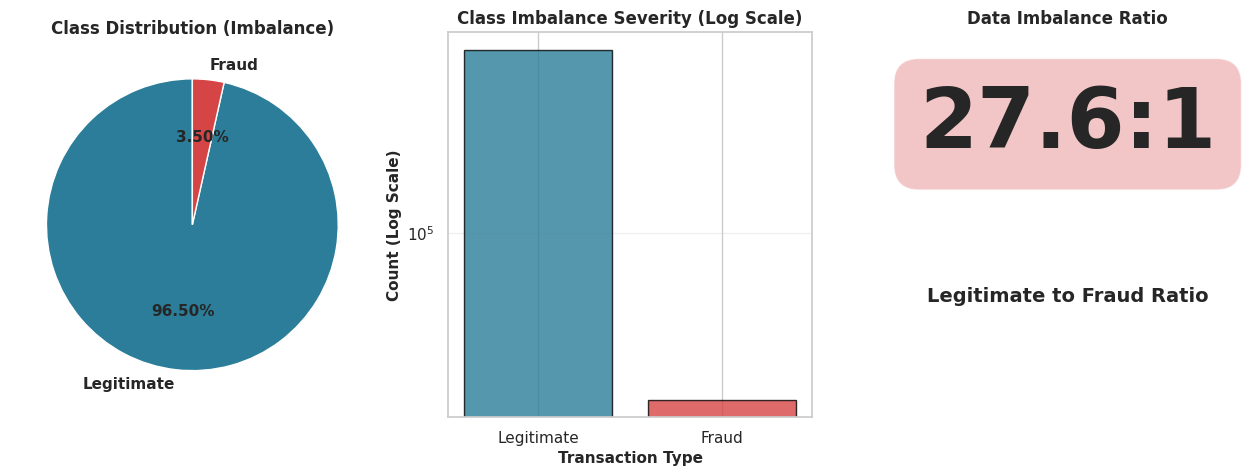

In [ ]:
print("Method 1: Analyzing Target Variable 'isFraud' -")

# Get the exact percentage for 'isFraud'
fraud_percentage = df_cleaned['isFraud'].value_counts(normalize=True) * 100
print(f"Fraud Percentage:\n{fraud_percentage}\n")

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Subplot 1: Overall class distribution
ax1 = axes[0]
fraud_counts = df_cleaned['isFraud'].value_counts()
colors_pie = ['#2b7d99', '#d64545']
wedges, texts, autotexts = ax1.pie(fraud_counts.values, labels=['Legitimate', 'Fraud'],
                                     autopct='%1.2f%%', colors=colors_pie, startangle=90,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'})
ax1.set_title('Class Distribution (Imbalance)', fontsize=12, fontweight='bold')

# Subplot 2: Log scale bar chart
ax2 = axes[1]
ax2.bar(fraud_counts.index, fraud_counts.values, color=colors_pie, edgecolor='black', alpha=0.8)
ax2.set_yscale('log')
ax2.set_ylabel('Count (Log Scale)', fontsize=11, fontweight='bold')
ax2.set_xlabel('Transaction Type', fontsize=11, fontweight='bold')
ax2.set_title('Class Imbalance Severity (Log Scale)', fontsize=12, fontweight='bold')
ax2.set_xticks(fraud_counts.index)
ax2.set_xticklabels(['Legitimate', 'Fraud'])
ax2.grid(alpha=0.3, axis='y')

# Subplot 3: Ratio visualization
ax3 = axes[2]
ratio = fraud_counts[0] / fraud_counts[1]
ax3.text(0.5, 0.7, f'{ratio:.1f}:1', fontsize=60, fontweight='bold', ha='center',
         bbox=dict(boxstyle='round', facecolor='#d64545', alpha=0.3))
ax3.text(0.5, 0.3, 'Legitimate to Fraud Ratio', fontsize=14, fontweight='bold', ha='center')
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.axis('off')
ax3.set_title('Data Imbalance Ratio', fontsize=12, fontweight='bold')

plt.show()


**Conclusion 1:** The dataset is severely imbalanced.
Out of 590,540 transactions, approximately 96.5% are non-fraudulent (isFraud=0) and only 3.5% are fraudulent (isFraud=1).

This means that a model that simply guesses 'No Fraud' every time would be 96.5% accurate.
Therefore, 'accuracy' is a poor metric. We must use other metrics like Precision-Recall or F1-Score for our analysis.

### **Method 2: Correlation Analysis**

**The Goal:**
To connect the dots. We want to know which specific clues (features) show up every time a crime (Fraud) is committed.

**Why This Matters:**
We have over 200 features (suspects). If we try to draw a "red string" between all of them on our detective wall, we'll just end up with a tangled mess.

Instead, we filter for the **Top 15** features that have the strongest relationship with Fraud. We ignore the noise and focus strictly on the smoking guns.

Method 2: Analyzing Feature Correlation with 'isFraud'-
Top 20 most correlated features:
['V45' 'V86' 'V87' 'V44' 'V52' 'V51' 'V40' 'V39' 'V79' 'V43' 'V38' 'V94'
 'V42' 'V33' 'V17' 'V18' 'V81' 'V34' 'V74' 'V80']



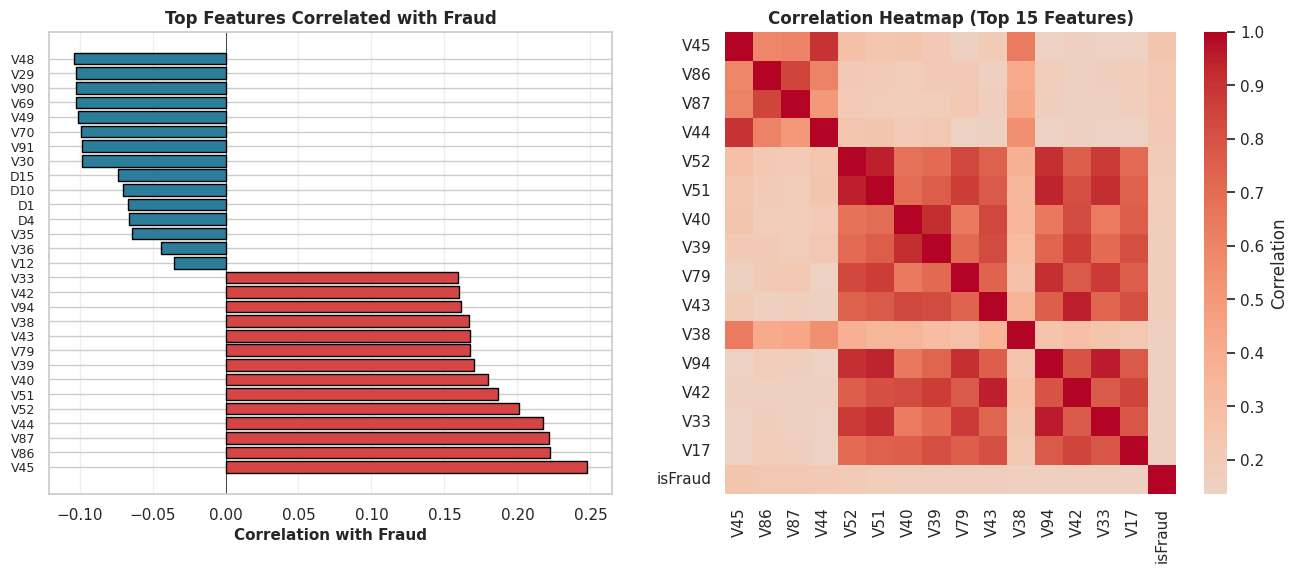

In [ ]:
print("Method 2: Analyzing Feature Correlation with 'isFraud'-")

# Calculate the correlation matrix for all numeric columns
corr_matrix = df_cleaned.corr(numeric_only=True)

# Top 20 features most correlated with 'isFraud'
# We use .abs() to find strong positive OR negative correlations
top_corr_features = corr_matrix['isFraud'].abs().sort_values(ascending=False)[1:21].index
print(f"Top 20 most correlated features:\n{top_corr_features.values}\n")

numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
correlation_with_fraud = df_cleaned[numeric_cols].corr()['isFraud'].sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Top Positive & Negative Correlations
ax1 = axes[0]
top_corr = pd.concat([correlation_with_fraud.head(15), correlation_with_fraud.tail(15)])
top_corr = top_corr[top_corr.index != 'isFraud']  # Exclude isFraud itself
colors_corr = ['#d64545' if x > 0 else '#2b7d99' for x in top_corr.values]
y_pos = np.arange(len(top_corr))
ax1.barh(y_pos, top_corr.values, color=colors_corr, edgecolor='black')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(top_corr.index, fontsize=9)
ax1.set_xlabel('Correlation with Fraud', fontsize=11, fontweight='bold')
ax1.set_title('Top Features Correlated with Fraud', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3, axis='x')
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Subplot 2: Correlation heatmap (top 15 features)
ax2 = axes[1]
top_features = correlation_with_fraud[correlation_with_fraud.index != 'isFraud'].head(15).index.tolist()
corr_matrix = df_cleaned[[*top_features, 'isFraud']].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, ax=ax2,
            cbar_kws={'label': 'Correlation'}, fmt='.2f')
ax2.set_title('Correlation Heatmap (Top 15 Features)', fontsize=12, fontweight='bold')

plt.show()


**Conclusion 2**: Several 'V' features are moderately correlated with fraud.
While no single feature has a very strong (e.g., > 0.8) correlation, the heatmap shows that features
like V45, V86, V87, V44, and V52 have the strongest linear relationships.

This is important because it identifies a clear list of features that are predictive of fraud.

It also highlights that fraud is not explained by one or two simple variables, but likely by the interaction of many.

### **Method 3: Hypothesis Testing & Outlier Analysis**

**The Goal:**
Follow the money. We need to determine if fraud leaves a distinct financial footprint compared to normal spending.

**Why This Matters:**
Do thieves always spend big to maximize their payout? Or do they test the waters with small amounts? To answer this, we can't just look at a chart; we need statistical proof.

We are running an **Independent Two-Sample T-Test** to settle this legally:

* **Null Hypothesis ($H_0$):** The mean transaction amount for Fraud is **EQUAL** to Non-Fraud. (i.e., Thieves spend just like normal people).
* **Alternative Hypothesis ($H_A$):** The mean transaction amount for Fraud is **DIFFERENT** than Non-Fraud. (i.e., There is a distinct criminal spending pattern).

**The Visualization:**
We will also use a **Box Plot** to spot the "Whales"—the extreme outliers that break the pattern and demand immediate attention.

Method 3: Hypothesis Test for Transaction Amount-
T-Test Results -
T-statistic: 8.9494
P-value: 3.846046075647657e-19



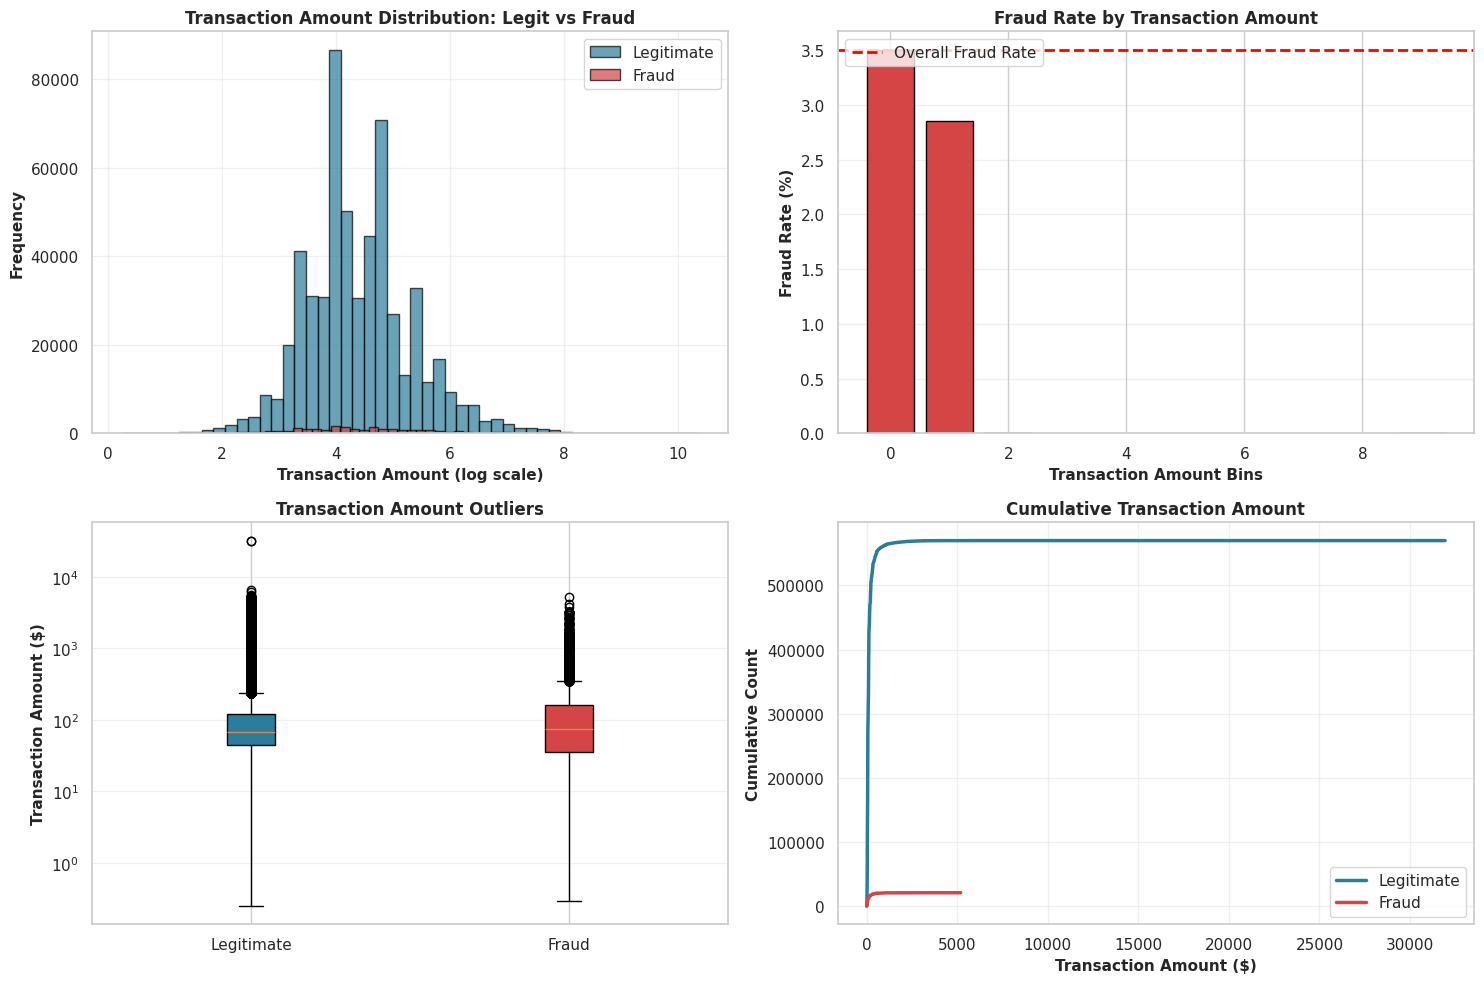

In [ ]:
print("Method 3: Hypothesis Test for Transaction Amount-")

# Create two groups for the t-test
fraud_transactions = df_cleaned[df_cleaned['isFraud'] == 1]['TransactionAmt']
non_fraud_transactions = df_cleaned[df_cleaned['isFraud'] == 0]['TransactionAmt']

# Performing the t-test
t_statistic, p_value = stats.ttest_ind(
    fraud_transactions,
    non_fraud_transactions,
    equal_var=False,
    nan_policy='omit'
)

print(f"T-Test Results -")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value}\n")


# Plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Subplot 1: Distribution of Transaction Amount
ax1 = axes[0, 0]
df_cleaned[df_cleaned['isFraud'] == 0]['TransactionAmt'].apply(np.log1p).hist(
    bins=50, ax=ax1, alpha=0.7, label='Legitimate', color='#2b7d99', edgecolor='black'
)
df_cleaned[df_cleaned['isFraud'] == 1]['TransactionAmt'].apply(np.log1p).hist(
    bins=50, ax=ax1, alpha=0.7, label='Fraud', color='#d64545', edgecolor='black'
)
ax1.set_xlabel('Transaction Amount (log scale)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax1.set_title('Transaction Amount Distribution: Legit vs Fraud', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Subplot 2: Fraud Rate by Transaction Amount Bins
ax2 = axes[0, 1]
df_temp_bins = df_cleaned[['TransactionAmt', 'isFraud']].copy()
df_temp_bins['amt_bin'] = pd.cut(df_temp_bins['TransactionAmt'], bins=10)
fraud_rate_by_amt = df_temp_bins.groupby('amt_bin', observed=False)['isFraud'].agg(['sum', 'count'])
fraud_rate_by_amt['fraud_rate'] = (fraud_rate_by_amt['sum'] / fraud_rate_by_amt['count'] * 100)
ax2.bar(range(len(fraud_rate_by_amt)), fraud_rate_by_amt['fraud_rate'].values,
        color=['#d64545' if x > fraud_rate_by_amt['fraud_rate'].mean() else '#2b7d99'
               for x in fraud_rate_by_amt['fraud_rate'].values], edgecolor='black')
ax2.axhline(y=df_cleaned['isFraud'].mean()*100, color='red', linestyle='--', linewidth=2, label='Overall Fraud Rate')
ax2.set_xlabel('Transaction Amount Bins', fontsize=11, fontweight='bold')
ax2.set_ylabel('Fraud Rate (%)', fontsize=11, fontweight='bold')
ax2.set_title('Fraud Rate by Transaction Amount', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3, axis='y')

# Subplot 3: Box plot of Transaction Amount
ax3 = axes[1, 0]
bp_data = [df_cleaned[df_cleaned['isFraud'] == 0]['TransactionAmt'],
           df_cleaned[df_cleaned['isFraud'] == 1]['TransactionAmt']]
bp = ax3.boxplot(bp_data, tick_labels=['Legitimate', 'Fraud'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['#2b7d99', '#d64545']):
    patch.set_facecolor(color)
ax3.set_yscale('log')
ax3.set_ylabel('Transaction Amount ($)', fontsize=11, fontweight='bold')
ax3.set_title('Transaction Amount Outliers', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3, axis='y')

# Subplot 4: Cumulative distribution
ax4 = axes[1, 1]
legit_sorted = np.sort(df_cleaned[df_cleaned['isFraud'] == 0]['TransactionAmt'])
fraud_sorted = np.sort(df_cleaned[df_cleaned['isFraud'] == 1]['TransactionAmt'])
ax4.plot(legit_sorted, np.arange(1, len(legit_sorted)+1), label='Legitimate', linewidth=2.5, color='#2b7d99')
ax4.plot(fraud_sorted, np.arange(1, len(fraud_sorted)+1), label='Fraud', linewidth=2.5, color='#d64545')
ax4.set_xlabel('Transaction Amount ($)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Cumulative Count', fontsize=11, fontweight='bold')
ax4.set_title('Cumulative Transaction Amount', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()


**Conclusion 3: The Verdict**

The evidence is overwhelming.
* **The P-Value ($3.84 \times 10^{-19}$):** This number is effectively zero. In statistical terms, we **REJECT** the null hypothesis. In plain English? The difference in spending habits is real, not random luck.
* **The Red Flags:** The plot also exposes thousands of **outliers** in both groups—extreme values that our model will need to learn to handle so it doesn't get confused by a wealthy customer buying a TV.

***Transaction Amount Distribution (Log Scale)*** -
The histogram on a log scale shows that both legiti and fraudulent transactions follow a similar log-normal pattern. Fraudulent transactions peak at slightly lower amounts, but the two distributions still overlap heavily. This suggests that transaction amount by itself is not a reliable indicator of fraud—fraudsters typically blend in by keeping amounts within common low-to-mid ranges rather than consistently targeting large sums.

***Fraud Rate by Transaction Amount Bins*** -
The bar chart makes the dataset’s strong right skew obvious: most transactions fall into the smallest value ranges. The higher-value bins look empty because even if such transactions exist, they are extremely rare compared to the huge volume of small ones. This displays that using equal-width bins isn’t ideal here and that the data is dominated by low-value transactions.

***Transaction Amount Outliers (Box Plot)*** -
The box plot display how the transaction amounts are spread out and it clearly shows that fraud is not simply linked to high amounts. In fact, fraudulent transactions have a lower median value than legitimate ones. Legitimate transactions also include the most extreme high-value outliers, meaning very large transactions are statistically more likely to be rare valid purchases than fraud.

***Cumulative Transaction Amount*** -
The cumulative plot rises sharply near zero, then levels off, forming an “elbow” shape. This means that almost all transactions—around 99%—occur at very small amounts for both classes. The long flat stretch to the right represents the tiny fraction of large transactions. This pattern reinforces that detecting fraud requires focusing on subtle signals in small transactions, not on assumptions about unusually high amounts.


### **Method 4: Temporal Analysis (Time Patterns)**

**The Goal:** To pinpoint the "Time of Crime." We are analyzing the timeline to see if fraudsters operate on a specific schedule—like striking in the dead of night when the world is asleep—or if they attack in coordinated waves over specific days.

**Why This Matters:** Context is everything. 100 fraudulent transactions at 2 PM might be normal because everyone is awake, but 100 fraudulent transactions at 4 AM is highly suspicious. We use these plots to distinguish between "busy hours" (high traffic) and "danger zones" (high fraud probability), helping us catch automated bots or international attacks that don't follow the local time zone.

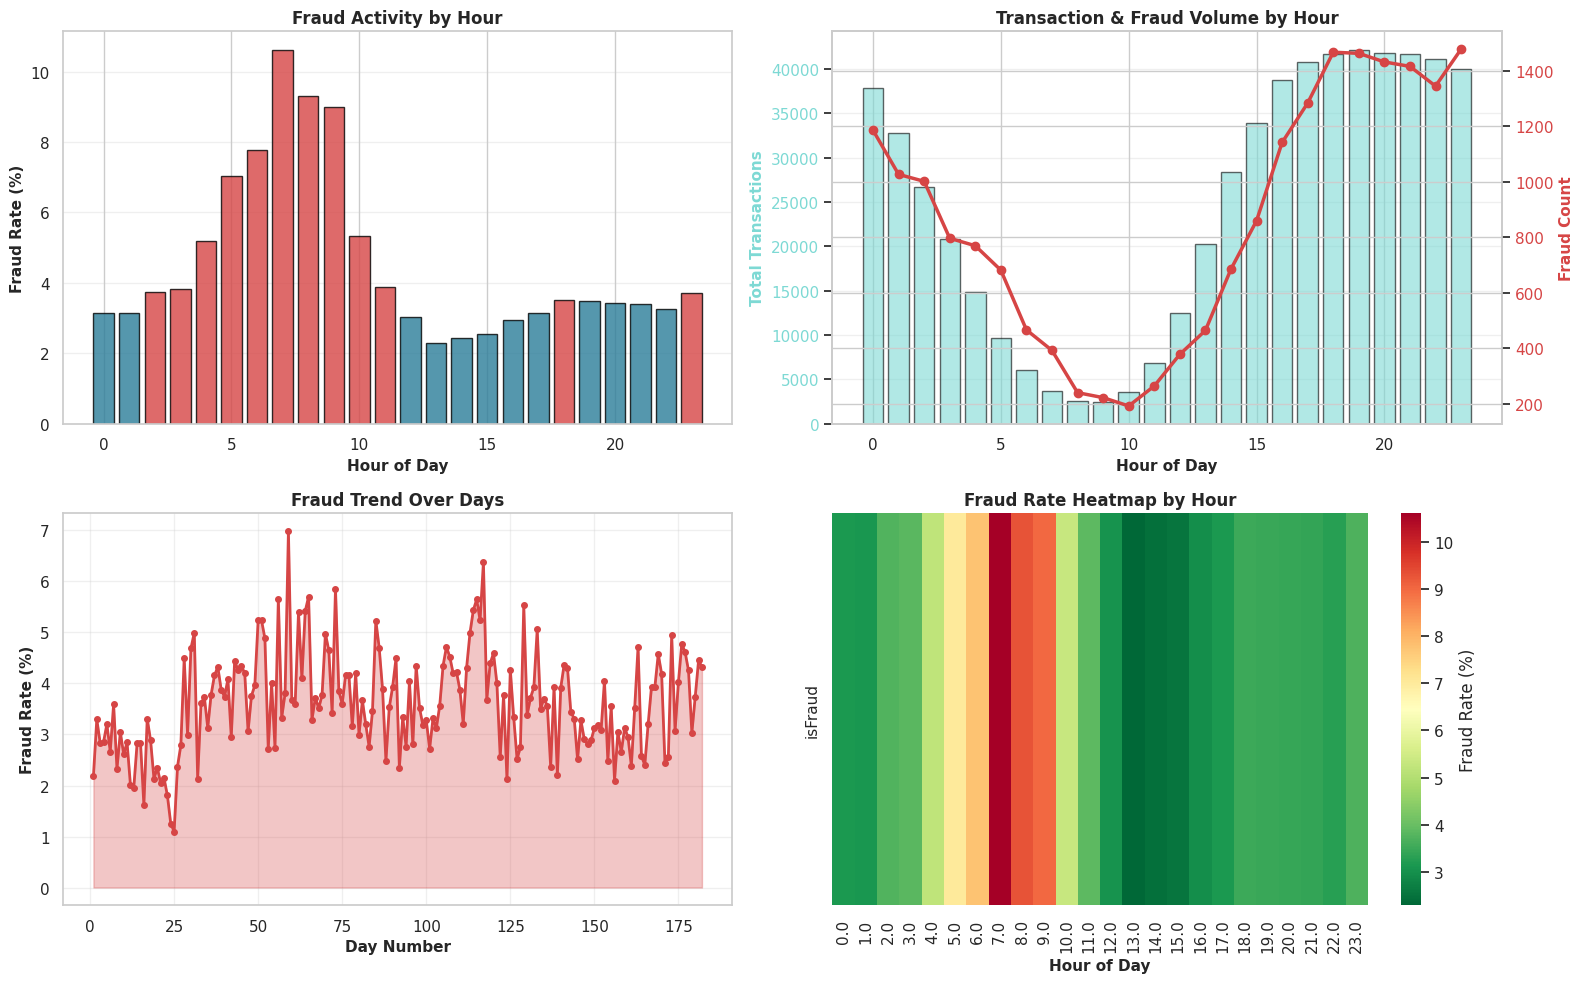

In [ ]:
hour_series = (df_cleaned['TransactionDT'] // 3600) % 24
day_series = df_cleaned['TransactionDT'] // (24 * 3600)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

ax1 = axes[0, 0]
hourly_fraud = df_cleaned.groupby(hour_series, observed=False)['isFraud'].agg(['sum', 'count'])
hourly_fraud['rate'] = hourly_fraud['sum'] / hourly_fraud['count'] * 100
colors_hourly = ['#d64545' if x > df_cleaned['isFraud'].mean()*100 else '#2b7d99' for x in hourly_fraud['rate']]
ax1.bar(hourly_fraud.index, hourly_fraud['rate'], color=colors_hourly, edgecolor='black', alpha=0.8)
ax1.set_xlabel('Hour of Day', fontsize=11, fontweight='bold')
ax1.set_ylabel('Fraud Rate (%)', fontsize=11, fontweight='bold')
ax1.set_title('Fraud Activity by Hour', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3, axis='y')

ax2 = axes[0, 1]
ax2_twin = ax2.twinx()
ax2.bar(hourly_fraud.index, hourly_fraud['count'], color='#7dd9d4', alpha=0.6, label='Total Transactions', edgecolor='black')
ax2_twin.plot(hourly_fraud.index, hourly_fraud['sum'], color='#d64545', marker='o', linewidth=2.5, markersize=6, label='Frauds')
ax2.set_xlabel('Hour of Day', fontsize=11, fontweight='bold')
ax2.set_ylabel('Total Transactions', fontsize=11, fontweight='bold', color='#7dd9d4')
ax2_twin.set_ylabel('Fraud Count', fontsize=11, fontweight='bold', color='#d64545')
ax2.set_title('Transaction & Fraud Volume by Hour', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3, axis='y')
ax2.tick_params(axis='y', labelcolor='#7dd9d4')
ax2_twin.tick_params(axis='y', labelcolor='#d64545')

ax3 = axes[1, 0]
daily_fraud = df_cleaned.groupby(day_series, observed=False)['isFraud'].agg(['sum', 'count'])
daily_fraud['rate'] = daily_fraud['sum'] / daily_fraud['count'] * 100
ax3.plot(daily_fraud.index, daily_fraud['rate'], color='#d64545', linewidth=2, marker='o', markersize=4, label='Fraud Rate')
ax3.fill_between(daily_fraud.index, daily_fraud['rate'], alpha=0.3, color='#d64545')
ax3.set_xlabel('Day Number', fontsize=11, fontweight='bold')
ax3.set_ylabel('Fraud Rate (%)', fontsize=11, fontweight='bold')
ax3.set_title('Fraud Trend Over Days', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)

ax4 = axes[1, 1]
heatmap_data = df_cleaned['isFraud'].groupby(hour_series, observed=False).mean() * 100
heatmap_df = pd.DataFrame(heatmap_data).T
sns.heatmap(heatmap_df, cmap='RdYlGn_r', annot=False, fmt='.1f', cbar_kws={'label': 'Fraud Rate (%)'}, ax=ax4)
ax4.set_xlabel('Hour of Day', fontsize=11, fontweight='bold')
ax4.set_title('Fraud Rate Heatmap by Hour', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Our timeline analysis reveals that fraudsters prefer to operate in the shadows, similar to burglars striking when a neighborhood is quiet. While the sheer number of fraudulent transactions is highest in the evenings when everyone is shopping, the risk is actually highest in the early morning (5 AM – 10 AM). This "sleeping user" effect occurs because legitimate customers are offline, causing the fraudulent activity to stand out sharply. Additionally, the day-by-day view shows a clear "attack wave" starting around Day 30, where the fraudsters suddenly became more aggressive and unpredictable, indicating a distinct shift in their strategy.

## **5. Feature Encoding & Train-Test Split**

**Digitizing the Clues:**
Forensic algorithms cannot process words. To make the evidence usable, we must convert categorical labels (like card type or email provider) into machine-readable numbers. We also discard administrative noise like `TransactionID`—the case number doesn't make you guilty.

**The Control Group:**
To ensure our investigation is unbiased, we split the evidence.
* **Training Set (80%):** The case files we analyze to build a suspect profile.
* **Test Set (20%):** The unexposed cases we use to verify if that profile actually works in the real world.

In [ ]:
# We drop TransactionID, TransactionDT and isFraud as they are not features
cols_to_drop_model = ['isFraud', 'TransactionID', 'TransactionDT']

# Filter to ensure we only drop columns that actually exist
existing_drop_cols = [c for c in cols_to_drop_model if c in df_cleaned.columns]

X = df_cleaned.drop(columns=existing_drop_cols)
y = df_cleaned['isFraud']

# Encode Categorical Features
cat_cols = X.select_dtypes(include=['object']).columns
print(f"Encoding {len(cat_cols)} categorical columns..")

for col in cat_cols:
    le = LabelEncoder()
    X[col] = X[col].astype(str)
    X[col] = le.fit_transform(X[col])

# We take 5% out completely. This 'X_holdout' is our final "unseen" data.
X_main, X_holdout, y_main, y_holdout = train_test_split( X, y, test_size=0.05, random_state=42, stratify=y)

# 'Stratify=y' ensures that both the training and test sets have the same percentage of Fraud (3.5%)
X_train, X_test, y_train, y_test = train_test_split( X_main, y_main, test_size=0.2, random_state=42, stratify=y_main)

print(f"Data Split Complete.")
print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape:  {X_test.shape}")
print(f"Holdout Shape (Final Check): {X_holdout.shape}")

Encoding 49 categorical columns..
Data Split Complete.
Training Shape: (448810, 237)
Testing Shape:  (112203, 237)
Holdout Shape (Final Check): (29527, 237)


## **6. Building the Basic Detector**

Every investigation starts with the obvious leads. We’re deploying a simple Logistic Regression model on the raw evidence to see if the case is easy to crack. If this fails, we know we need more advanced tactics.

### **6.1 Logistic Regression (Raw Data)**

**The Strategy: The "Rookie" Detective**
Every investigation starts with the obvious leads. We are deploying a simple **Logistic Regression** model on the raw evidence to establish a baseline.

* **The Goal:** See if the case is easy to crack.
* **The Logic:** If this simple model fails to catch the fraudsters, we have proof that the crime is complex, justifying the use of "heavy artillery" (Random Forest/XGBoost) later.

**The Technical Necessity: Scaling the Evidence**
Logistic Regression is sensitive to the "magnitude" of the clues. It might blindly assume a **$10,000** transaction is more important than a **Device ID of 5** simply because the number is larger.

We apply **StandardScaler** which shrinks all numbers to the same range (roughly -1 to 1) so the model judges features based on their *predictive power*, not their size.

In [ ]:
print("Baseline Model Training...")

# Standard Scaling is required for Logistic Regression
baseline_model = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', random_state=42, max_iter=1000))

baseline_model.fit(X_train, y_train)

# Get Baseline Predictions
y_prob_base = baseline_model.predict_proba(X_test)[:, 1]
y_pred_base = baseline_model.predict(X_test)

baseline_auc = roc_auc_score(y_test, y_prob_base)
print(f"Baseline ROC-AUC Score: {baseline_auc:.4f}")
print("Baseline Report:\n", classification_report(y_test, y_pred_base))

Baseline Model Training...
Baseline ROC-AUC Score: 0.8385
Baseline Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98    113975
         1.0       0.75      0.16      0.27      4133

    accuracy                           0.97    118108
   macro avg       0.86      0.58      0.63    118108
weighted avg       0.96      0.97      0.96    118108



### **6.2 Performance Check: "Can we do better?"**

The Verdict: Good Instincts, Bad Eyesight
This is a classic "High Precision, Low Recall" result.

Accuracy (97%) is a Mirage: In a dataset where 96.5% of transactions are legit, this score essentially means the model is lazy, not smart.

ROC-AUC (0.84) is Decent: We are beating random guesses, but we aren't elite yet.

Precision (0.75) is Trustworthy: When the model does flag a crime, it's usually right. False alarms are low.

***Recall (0.16) is the Failure: This is the dealbreaker. We are catching only 16% of the fraudsters. The vast majority are walking away undetected.***

## **7. Model Comparison: The Stress Test**

**The Logic:**
Is the problem solvable with simple math, or do we need heavy computation?
We are pitting our baseline Logistic Regression against the heavyweights of the machine learning world: **Random Forest** and **XGBoost**.

**Why Compare?**

Advanced models are powerful, but they can also be slow or prone to memorizing data (overfitting). We compare them side-by-side to ensure that the extra complexity actually yields better results in catching fraud.



### **7.1 Random Forest Classifier**

**The Strategy: The Task Force**
Our single detective (Logistic Regression) struggled with the complexity of the case. It's time to bring in a full task force.
The **Random Forest** algorithm doesn't rely on just one decision; it builds a "forest" of hundreds of individual Decision Trees.

**How it Works:**
Imagine 100 detectives examining the same evidence, but each asking different questions. One looks at the money, one looks at the location, and one looks at the device. They then **vote** on the final verdict. This \"crowd wisdom\" helps filter out noise and catches complex, non-linear schemes that a single linear model would miss.

Training Model 2 (Random Forest) -

--- Model 2 Results: Random Forest ---
Accuracy:  0.9555
ROC-AUC:   0.9547

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98    113975
         1.0       0.43      0.79      0.55      4133

    accuracy                           0.96    118108
   macro avg       0.71      0.87      0.76    118108
weighted avg       0.97      0.96      0.96    118108



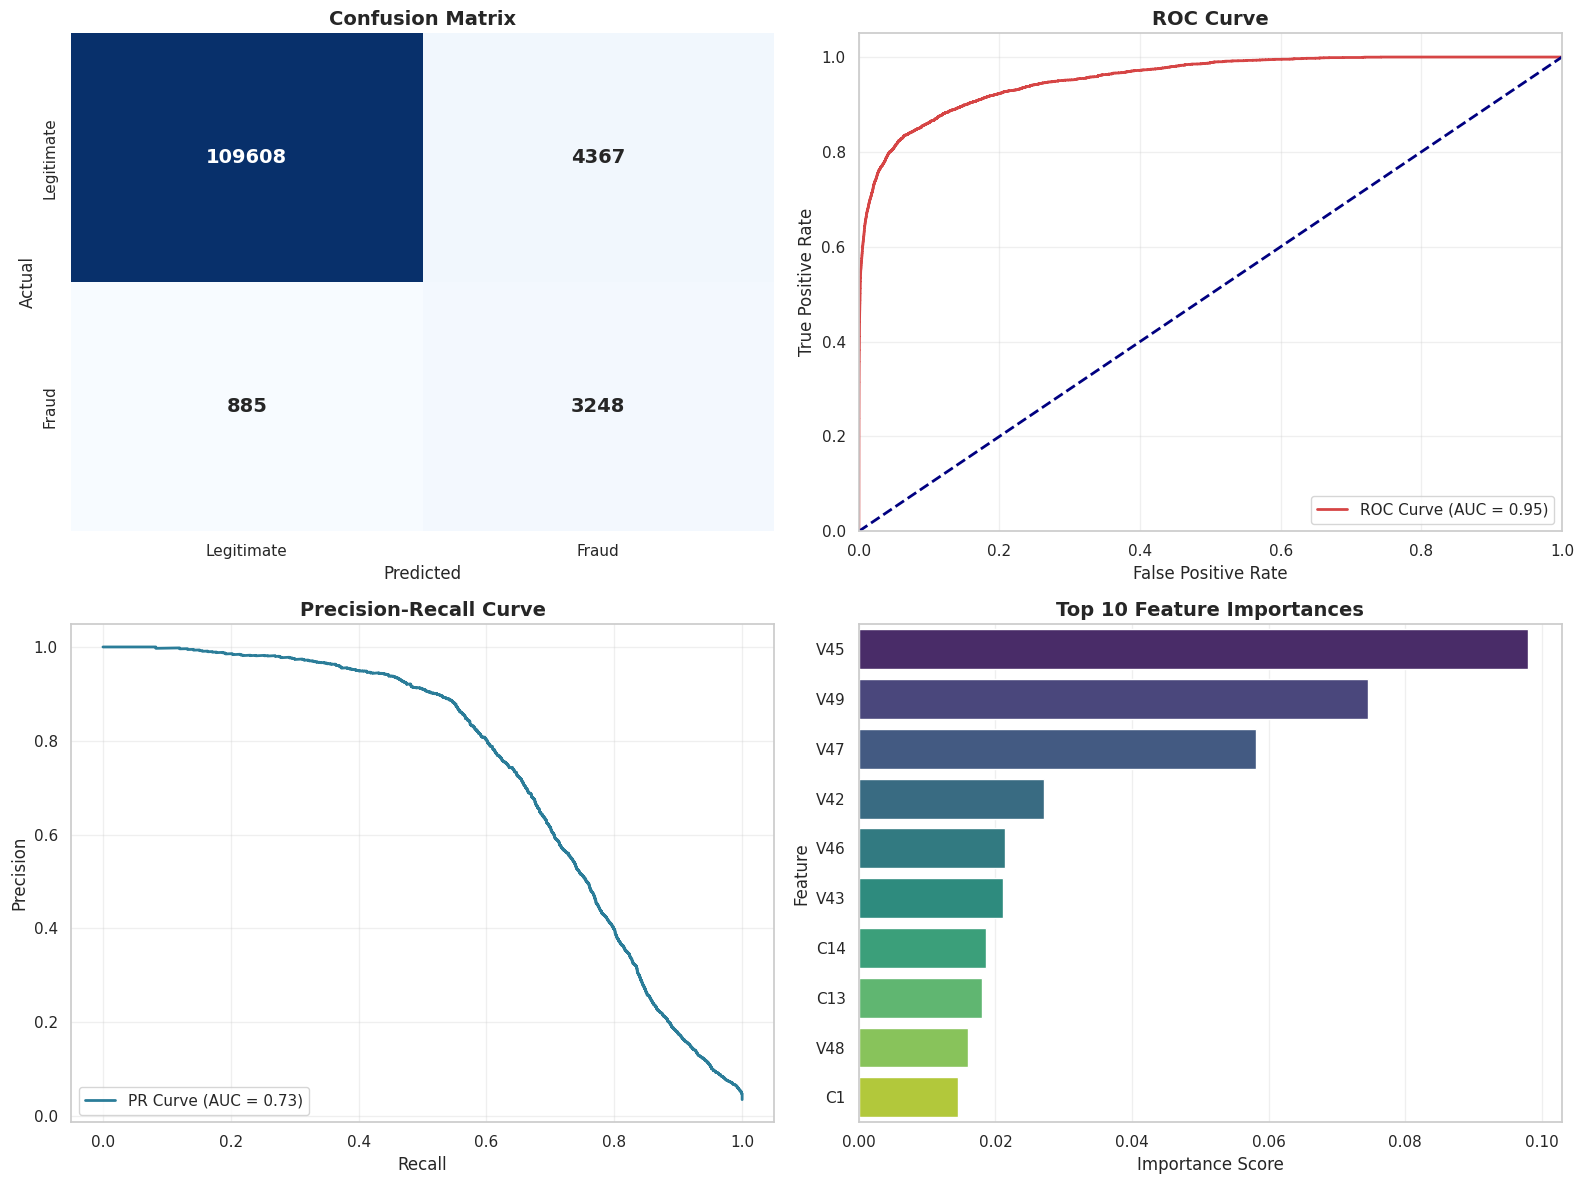

In [ ]:
print("Training Model 2 (Random Forest) -")

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced',
    verbose=0 # Set to 0 to keep output clean
)

rf_model.fit(X_train, y_train)

# Get predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("\n--- Model 2 Results: Random Forest ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# --- VISUALIZATION DASHBOARD ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'})
axes[0, 0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Predicted', fontsize=12)
axes[0, 0].set_ylabel('Actual', fontsize=12)
axes[0, 0].set_xticklabels(['Legitimate', 'Fraud'])
axes[0, 0].set_yticklabels(['Legitimate', 'Fraud'])

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)
axes[0, 1].plot(fpr, tpr, color='#d64545', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate', fontsize=12)
axes[0, 1].set_ylabel('True Positive Rate', fontsize=12)
axes[0, 1].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[0, 1].legend(loc="lower right")
axes[0, 1].grid(alpha=0.3)

# 3. Precision-Recall Curve (Best for Imbalanced Data)
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)
pr_auc = auc(recall, precision)
axes[1, 0].plot(recall, precision, color='#2b7d99', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
axes[1, 0].set_xlabel('Recall', fontsize=12)
axes[1, 0].set_ylabel('Precision', fontsize=12)
axes[1, 0].set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
axes[1, 0].legend(loc="lower left")
axes[1, 0].grid(alpha=0.3)

# 4. Feature Importances
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False).head(10)

sns.barplot(x='importance', y='feature', data=feature_importances,
            hue='feature', palette='viridis', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Top 10 Feature Importances', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Importance Score', fontsize=12)
axes[1, 1].set_ylabel('Feature', fontsize=12)
axes[1, 1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

**The Verdict:**

Our switch to the Random Forest was a massive success.
* **The Big Win (Recall):** We went from catching **16%** of fraudsters (Logistic Regression) to **79%**. We are no longer letting the majority of criminals walk away.
* **The Trade-off (Precision):** Precision dropped to **43%**. This means we are casting a wider net—we catch almost all the bad guys, but we also flag more innocent people for review.
* **Overall Intelligence (ROC-AUC):** A score of **0.95** puts us in the elite tier. This model actually understands the difference between fraud and legitimate spending.

#### **Vizualization - Decision Tree**

To verify our model isn't guessing, we visualize the first three levels of its decision-making process. The colors guide us: blue paths lead towards Fraud patterns, while orange paths identify safe, Non-Fraud behavior.

Visualizing a Single Decision Tree (Depth=7)...


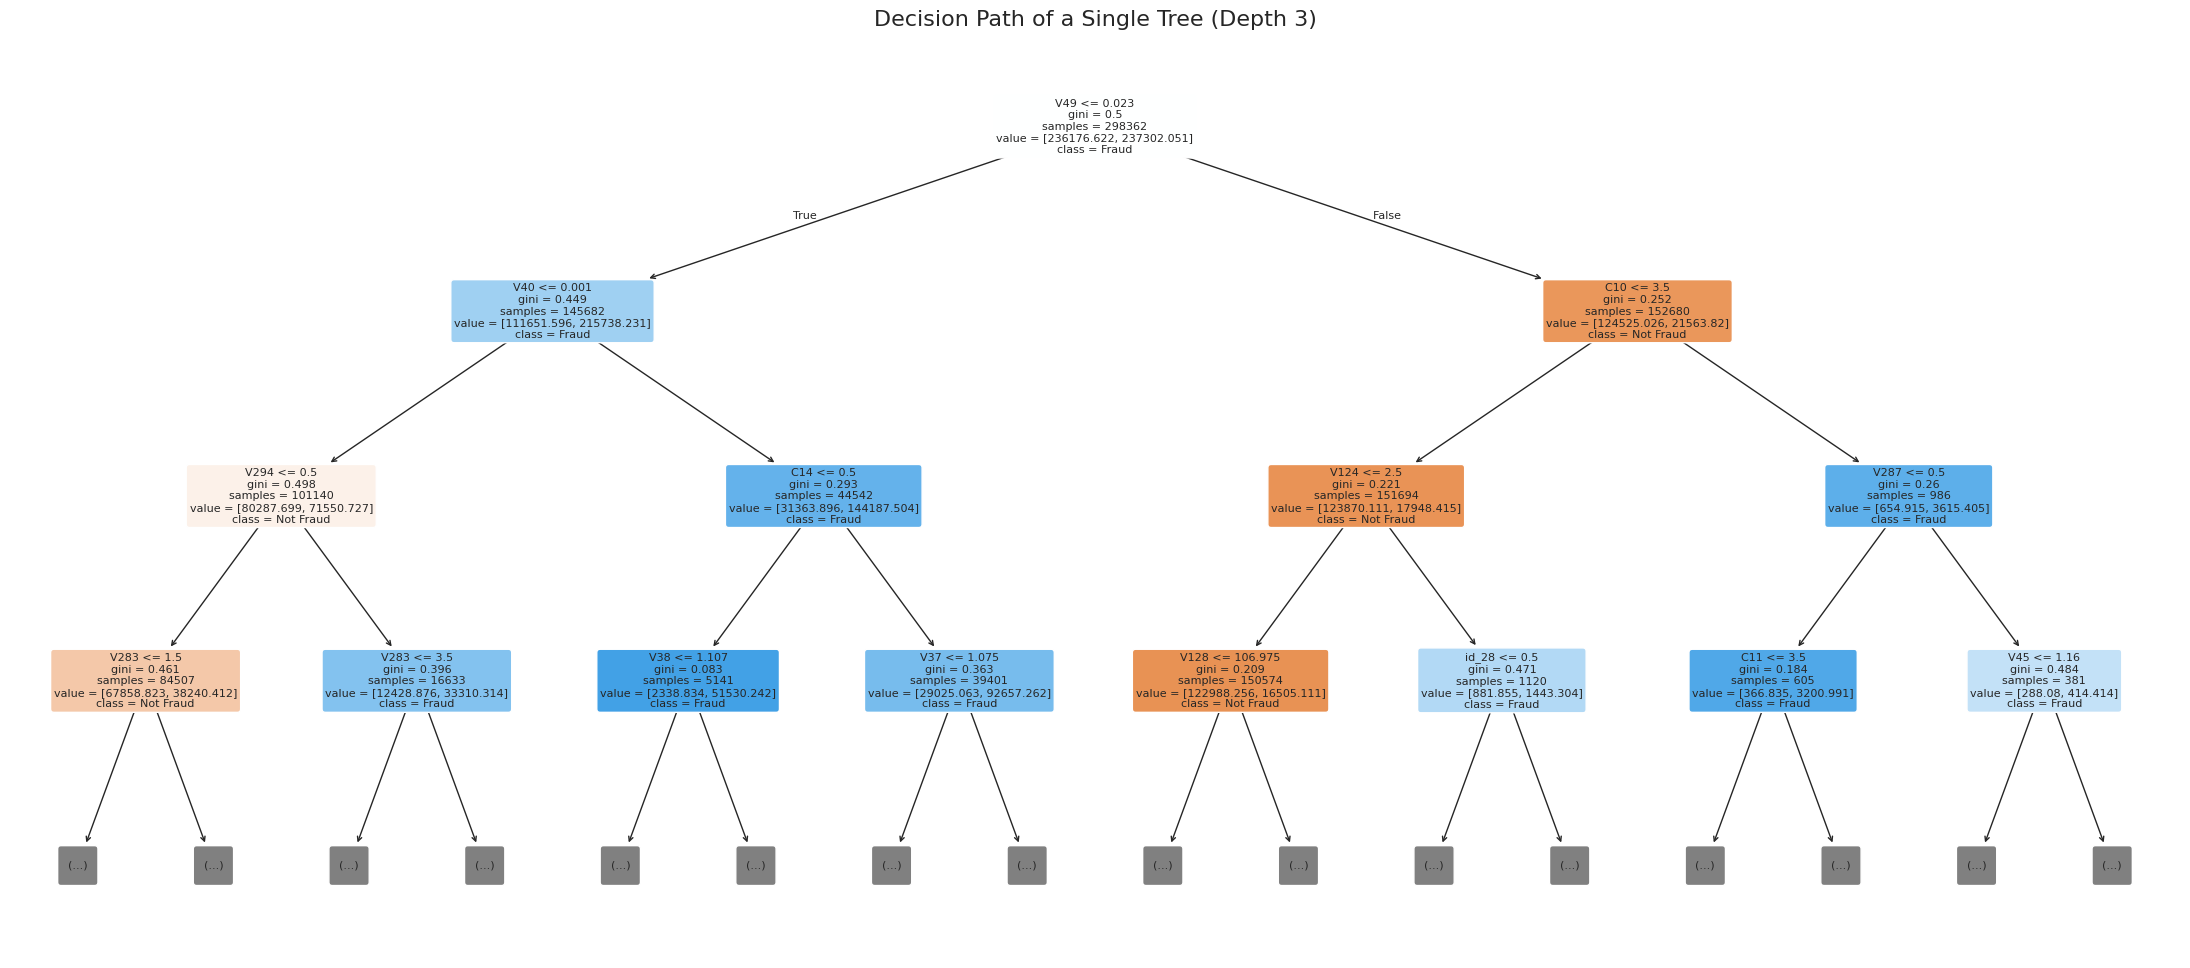

In [ ]:
print("Visualizing a Single Decision Tree (Depth=7)...")

# Pick the first tree from the forest
one_tree = rf_model.estimators_[0]

plt.figure(figsize=(28, 12)) # Large size to accommodate depth 7
plot_tree(
    one_tree,
    feature_names=X_train.columns,
    class_names=['Not Fraud', 'Fraud'],
    filled=True,
    rounded=True,
    max_depth=3,    # Depth set to 3 as requested
    fontsize=8      # Smaller font to fit the text
)
plt.title("Decision Path of a Single Tree (Depth 3)", fontsize=16)
plt.show()

### **7.2 XGBoost:**

We are deploying XGBoost, an algorithm designed for maximum performance. Unlike Random Forest, which averages many decisions, XGBoost learns iteratively—each new tree is generated specifically to fix the prediction errors of the previous one. This usually results in higher accuracy and faster execution.

Model 3: XGBoost...
Imbalance Ratio (scale_pos_weight): 27.58
Training XGBoost...

--- Model 3 Results: XGBoost ---
Accuracy:  0.9543
ROC-AUC:   0.9740

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    113975
         1.0       0.43      0.87      0.57      4133

    accuracy                           0.95    118108
   macro avg       0.71      0.91      0.77    118108
weighted avg       0.98      0.95      0.96    118108



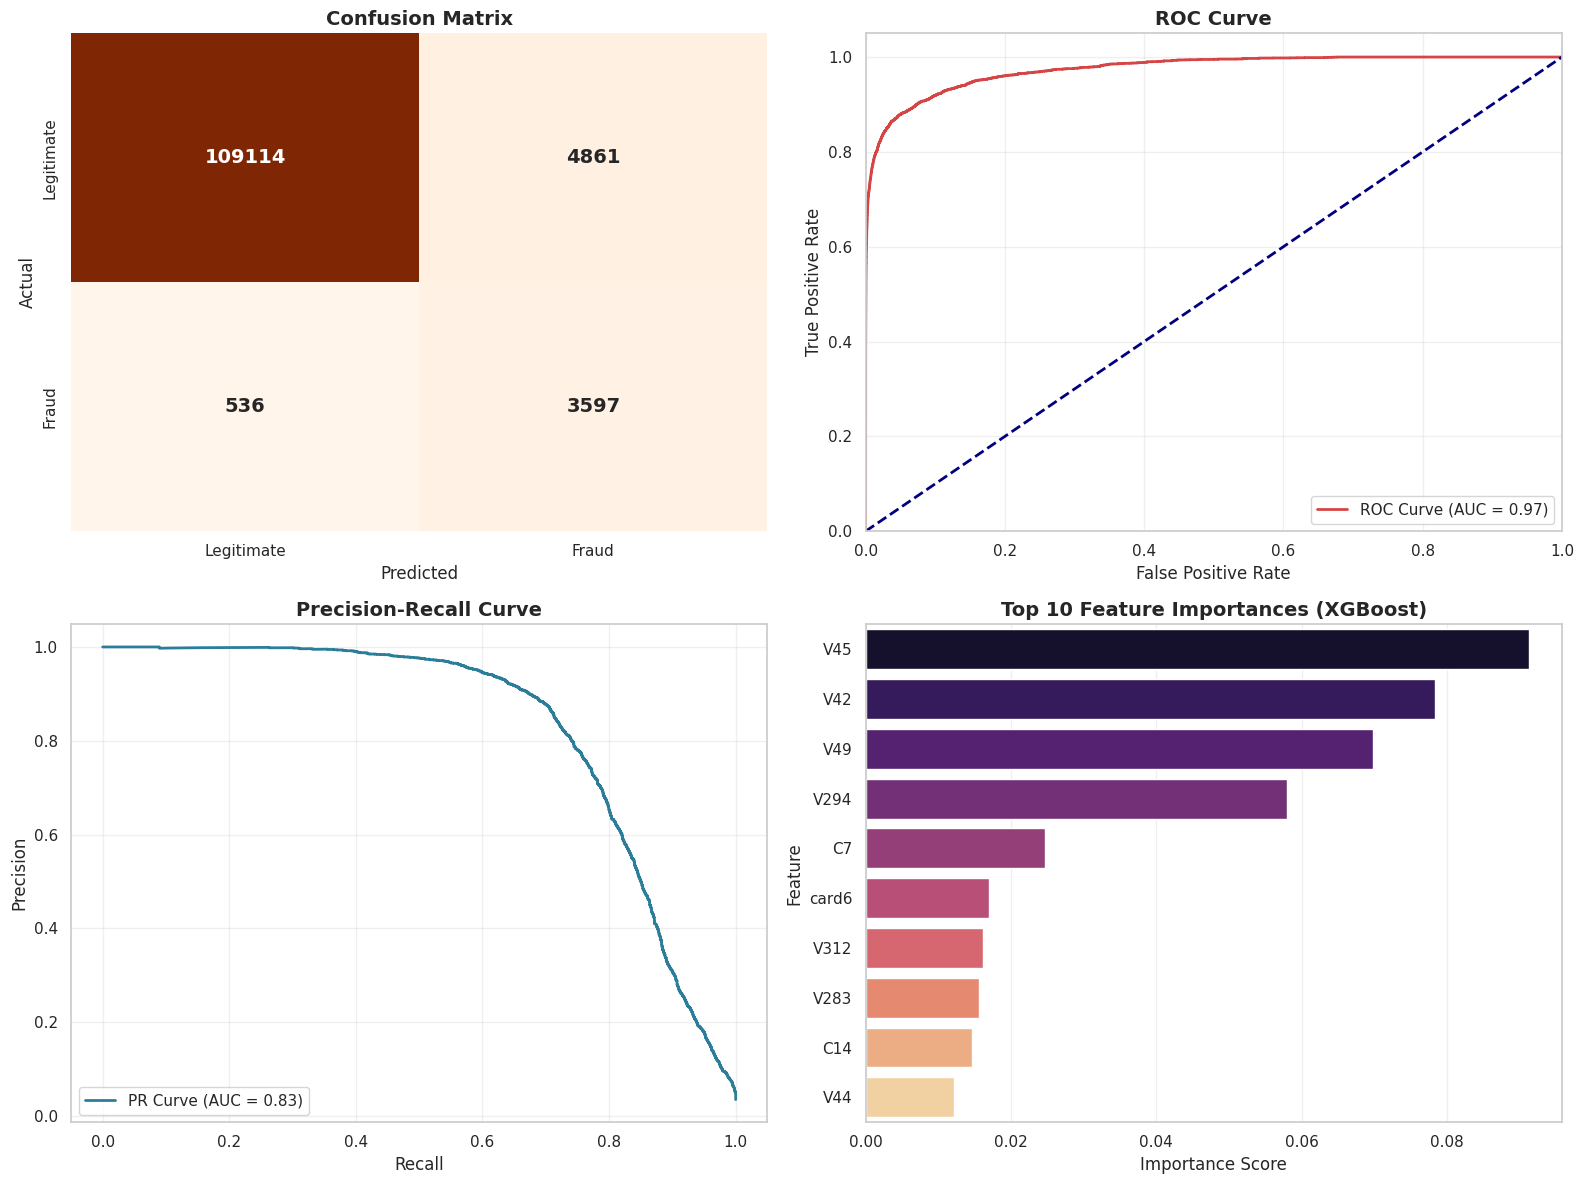

In [ ]:
print("Model 3: XGBoost...")

# 1. Handle Class Imbalance
weight_ratio = float(len(y_train[y_train == 0])) / len(y_train[y_train == 1])
print(f"Imbalance Ratio (scale_pos_weight): {weight_ratio:.2f}")

# 2. Initialize XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=9,            # Slightly deeper to capture complex fraud patterns
    learning_rate=0.1,
    scale_pos_weight=weight_ratio, # Critical for this imbalanced dataset
    eval_metric='auc',      # Optimize for ROC-AUC directly
    random_state=42,
    n_jobs=-1,
    tree_method='hist'      # 'hist' is much faster for large datasets
)

# 3. Train
print("Training XGBoost...")
xgb_model.fit(X_train, y_train)

# 4. Predict
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# 5. Evaluate
print("\n--- Model 3 Results: XGBoost ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob_xgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# --- VISUALIZATION DASHBOARD ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=axes[0, 0], cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'})
axes[0, 0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Predicted', fontsize=12)
axes[0, 0].set_ylabel('Actual', fontsize=12)
axes[0, 0].set_xticklabels(['Legitimate', 'Fraud'])
axes[0, 0].set_yticklabels(['Legitimate', 'Fraud'])

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)
axes[0, 1].plot(fpr, tpr, color='#d64545', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate', fontsize=12)
axes[0, 1].set_ylabel('True Positive Rate', fontsize=12)
axes[0, 1].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[0, 1].legend(loc="lower right")
axes[0, 1].grid(alpha=0.3)

# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_xgb)
pr_auc = auc(recall, precision)
axes[1, 0].plot(recall, precision, color='#2b7d99', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
axes[1, 0].set_xlabel('Recall', fontsize=12)
axes[1, 0].set_ylabel('Precision', fontsize=12)
axes[1, 0].set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
axes[1, 0].legend(loc="lower left")
axes[1, 0].grid(alpha=0.3)

# 4. Feature Importances
feature_importances_xgb = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values(by='importance', ascending=False).head(10)

sns.barplot(x='importance', y='feature', data=feature_importances_xgb,
            hue='feature', palette='magma', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Top 10 Feature Importances (XGBoost)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Importance Score', fontsize=12)
axes[1, 1].set_ylabel('Feature', fontsize=12)
axes[1, 1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

**Verdict:**

The Champion Has Arrived XGBoost lives up to the hype. By analyzing the errors of previous trees, it pushed our performance into the elite tier.

- The Intelligence (ROC-AUC): We hit 0.974, a remarkable score that proves the model isn't just guessing; it deeply understands the difference between a criminal and a customer.

- The Catch Rate (Recall): We climbed to 87%. This means XGBoost found an additional ~8% of fraud cases that even the Random Forest missed.

- The Cost: Precision remained stable at 43%. We are still auditing innocent people to catch the thieves, but we are catching more thieves for the same amount of effort.

### **7.3 The Verdict: ROC-AUC Comparison**

###  **Evaluating our fraud detector: beyond plain accuracy**

In fraud detection, **accuracy alone is misleading**.  
We care about questions like:

- **How many frauds did we catch?** → high **recall**  
- **How many flagged transactions were false alarms?** → good **precision**  
- **How balanced is performance on both classes?** → **F1-score**  
- **How well can we rank transactions by risk?** → **ROC-AUC** / **PR-AUC**

The confusion matrix tells a very practical story:
- Top-left: ✅ genuine customers treated correctly.  
- Top-right: ❌ **false positives** – annoyed customers, but no money lost.  
- Bottom-left: ❌ **false negatives** – missed fraud, real financial loss.  
- Bottom-right: ✅ **correctly caught frauds**.

A risk team may prefer:
- to tolerate some **false positives**  
- in exchange for **dramatically fewer false negatives**.

We interpret our results in that spirit.


 7.3 The Verdict: ROC-AUC Comparison -

Final Leaderboard:
                 Model   ROC-AUC
0              XGBoost  0.974019
1        Random Forest  0.954724
2  Logistic Regression  0.838490




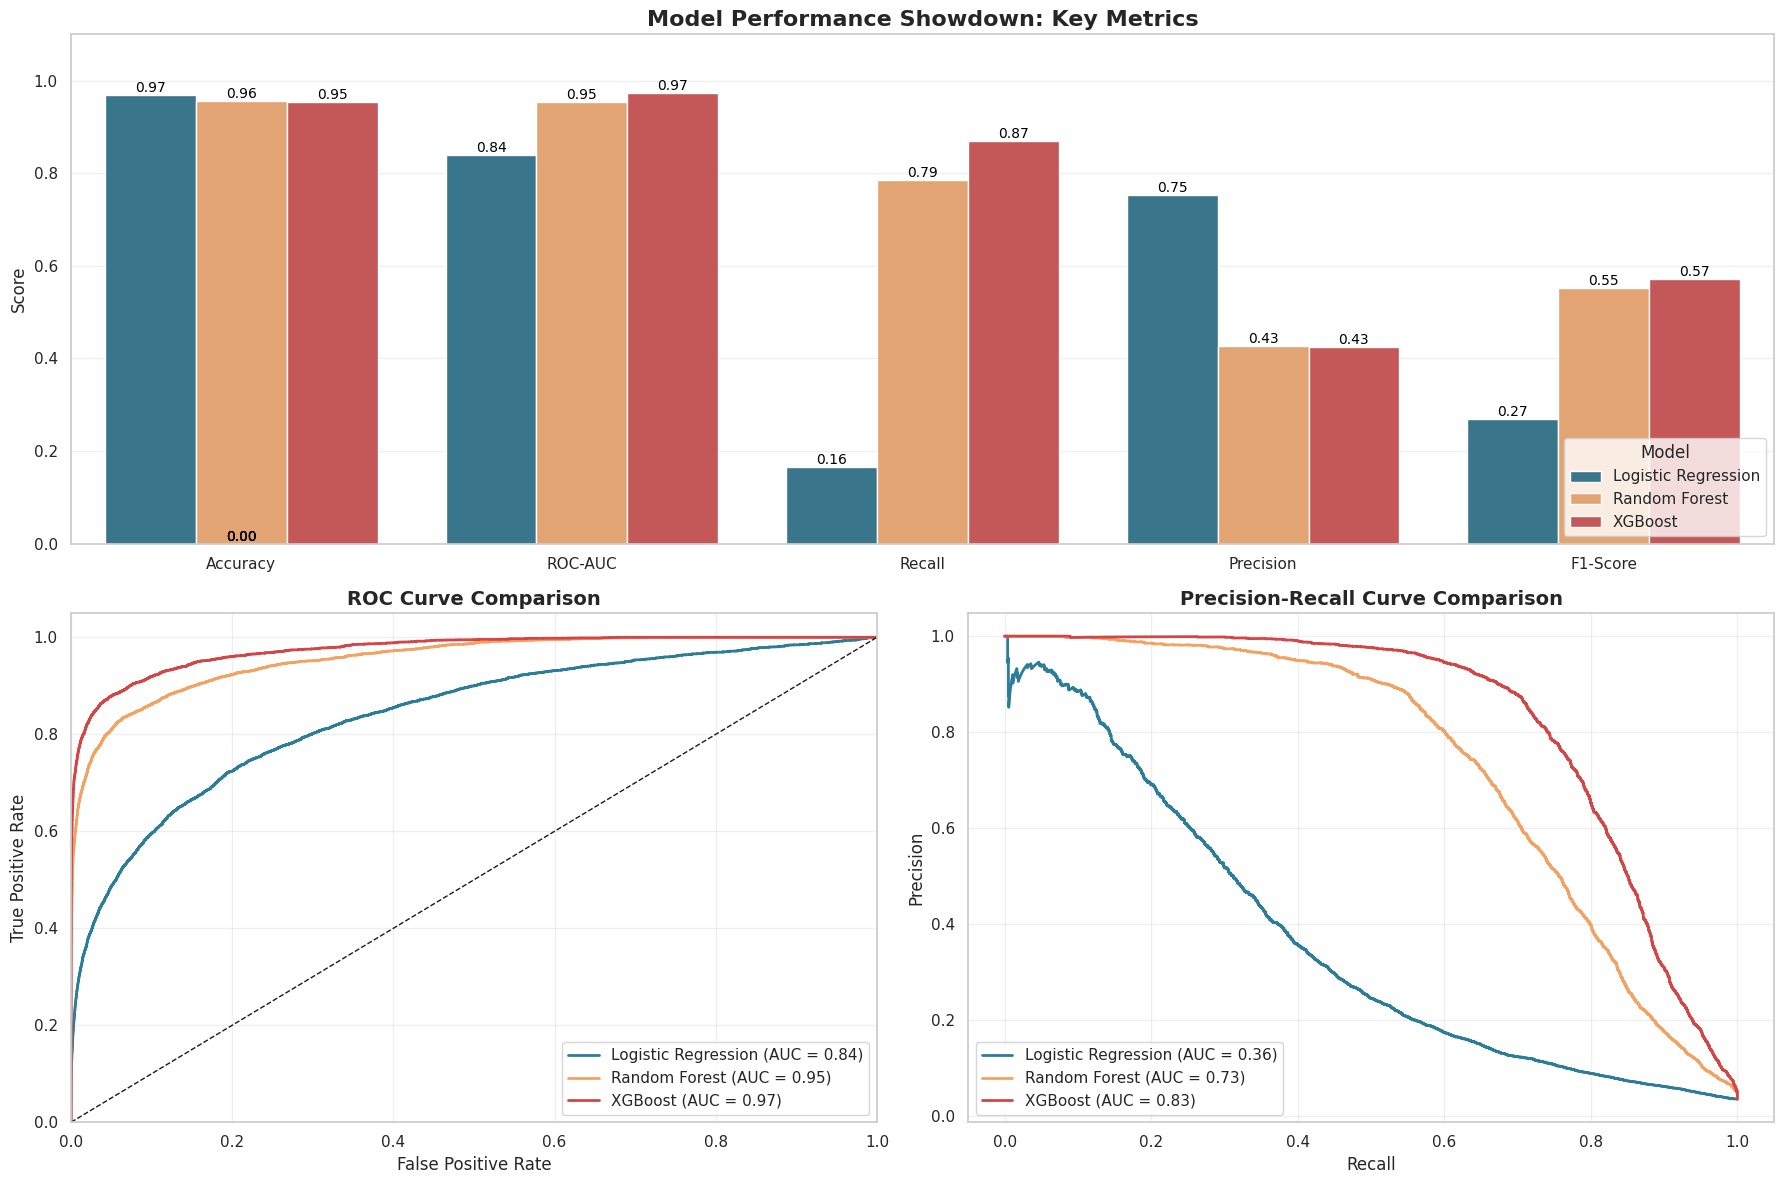

In [ ]:
print(" 7.3 The Verdict: ROC-AUC Comparison -")

# 1. Calculate Scores
# We assume you have run the previous cells and have these probability variables
score_lr  = roc_auc_score(y_test, y_prob_base)
score_rf  = roc_auc_score(y_test, y_prob_rf)
score_xgb = roc_auc_score(y_test, y_prob_xgb)

# 2. Create a Comparison DataFrame
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'ROC-AUC': [score_lr, score_rf, score_xgb]
})

# Sort by Score (Highest on top)
results = results.sort_values(by='ROC-AUC', ascending=False).reset_index(drop=True)

print("\nFinal Leaderboard:")
print(results)
print('\n')

# --- 1. GATHER PREDICTIONS ---
# (Assuming your models are named 'log_model', 'rf_model', 'xgb_model')

models = {
    'Logistic Regression': baseline_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

# Create a dictionary to store results
results = {}

for name, model in models.items():
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Store metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'y_prob': y_prob  # Save probas for plotting curves
    }

# Convert metrics to DataFrame for plotting
metrics_df = pd.DataFrame(results).T.drop(columns=['y_prob']) # Drop probs for the bar chart
metrics_df = metrics_df.reset_index().rename(columns={'index': 'Model'})
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# --- 2. VISUALIZATION DASHBOARD ---
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2)

# Plot 1: Grouped Bar Chart (Top spanning both columns)
ax1 = fig.add_subplot(gs[0, :])
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted, palette=['#2b7d99', '#f4a261', '#d64545'], ax=ax1)
ax1.set_ylim(0, 1.1)
ax1.set_title('Model Performance Showdown: Key Metrics', fontsize=16, fontweight='bold')
ax1.set_ylabel('Score', fontsize=12)
ax1.set_xlabel('')
ax1.legend(loc='lower right', title='Model', fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Plot 2: ROC Curve Overlay (Bottom Left)
ax2 = fig.add_subplot(gs[1, 0])
colors = {'Logistic Regression': '#2b7d99', 'Random Forest': '#f4a261', 'XGBoost': '#d64545'}

for name, model in models.items():
    y_prob = results[name]['y_prob']
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = results[name]['ROC-AUC']
    ax2.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})', color=colors[name], lw=2)

ax2.plot([0, 1], [0, 1], 'k--', lw=1) # Diagonal line
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve Comparison', fontsize=14, fontweight='bold')
ax2.legend(loc="lower right")
ax2.grid(alpha=0.3)

# Plot 3: Precision-Recall Curve Overlay (Bottom Right)
ax3 = fig.add_subplot(gs[1, 1])

for name, model in models.items():
    y_prob = results[name]['y_prob']
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    ax3.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})', color=colors[name], lw=2)

ax3.set_xlabel('Recall', fontsize=12)
ax3.set_ylabel('Precision', fontsize=12)
ax3.set_title('Precision-Recall Curve Comparison', fontsize=14, fontweight='bold')
ax3.legend(loc="lower left")
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### **Final Verdict: XGBoost Selected for Deployment**

**Why XGBoost wins:**

1. **Highest Recall (Most Important for Fraud Detection)**

   * Logistic Regression: Recall **0.16** → misses most fraud.
   * **XGBoost: Recall 0.87** → detects the majority of fraudulent transactions.

2. **Best Precision–Recall Performance**

   * XGBoost PR AUC: **0.83**
   * Logistic Regression PR AUC: **0.36**
     XGBoost handles class imbalance far more effectively.

3. **Acceptable Precision Trade-off**

   * Logistic Regression Precision: **0.75**
   * XGBoost Precision: **0.43**
     Lower precision is acceptable since false negatives (missed fraud) are costlier than false positives.

4. **Overall Strength**

   * **ROC-AUC: 0.97** (highest among all models)

**→ Final Choice: XGBoost**
It provides the strongest fraud detection performance and minimizes missed fraudulent activity.


## **8. Evaluating Unseen Evidence**


### **8.1 Processing Test Data**



In [ ]:
print("Processing External Test Data...")

# Reading the files
test_trans = pd.read_csv("/content/drive/MyDrive/602-Project/test_transaction.csv")
test_id = pd.read_csv("/content/drive/MyDrive/602-Project/test_identity.csv")

Processing External Test Data...


In [ ]:
df_test = test_trans.merge(test_id, how="left", on="TransactionID")

In [ ]:
print("Cleaning and Encoding Test Data...")

cols_to_keep = X_train.columns.tolist()
cols_to_keep_with_id = cols_to_keep + ['TransactionID']

for col in cols_to_keep:
    if col not in df_test.columns:
        df_test[col] = np.nan

X_submission = df_test[cols_to_keep_with_id].copy()

# Clean Categorical Data (Email Domains & NaNs)
print("Cleaning categorical inconsistencies...")

# Define domain mappings (same as training)
gmail_variations = ['gmail', 'googlemail.com']
yahoo_variations = ['yahoo.com.mx', 'ymail.com', 'yahoo.fr', 'yahoo.es', 'yahoo.de', 'yahoo.co.uk', 'yahoo.co.jp', 'rocketmail.com']
hotmail_variations = ['hotmail.co.uk', 'hotmail.de', 'hotmail.es', 'hotmail.fr']
outlook_variations = ['outlook.es']
live_variations = ['live.com.mx', 'live.fr']
apple_variations = ['me.com', 'mac.com', 'icloud.com']
german_variations = ['web.de', 'gmx.de']
aol_variations = ['aim.com']
netzero_variations = ['netzero.net']
isp_variations = ['comcast.net', 'att.net', 'sbcglobal.net', 'verizon.net', 'bellsouth.net', 'cox.net', 'optonline.net', 'charter.net', 'roadrunner.com', 'windstream.net', 'frontier.com', 'embarqmail.com', 'twc.com', 'centurylink.net', 'frontiernet.net', 'q.com', 'suddenlink.net', 'cfl.rr.com', 'sc.rr.com', 'cableone.net', 'ptd.net']

# Apply cleaning to object columns
object_cols = X_submission.select_dtypes(include='object').columns

for col in object_cols:
    X_submission[col] = X_submission[col].str.lower()
    X_submission[col] = X_submission[col].fillna('Missing') # Replace NaN with 'Missing'

    if col in ['P_emaildomain', 'R_emaildomain']:
        X_submission[col] = X_submission[col].replace(gmail_variations, 'gmail.com')
        X_submission[col] = X_submission[col].replace(yahoo_variations, 'yahoo.com')
        X_submission[col] = X_submission[col].replace(hotmail_variations, 'hotmail.com')
        X_submission[col] = X_submission[col].replace(outlook_variations, 'outlook.com')
        X_submission[col] = X_submission[col].replace(live_variations, 'live.com')
        X_submission[col] = X_submission[col].replace(apple_variations, 'apple.com')
        X_submission[col] = X_submission[col].replace(german_variations, 'german_mail')
        X_submission[col] = X_submission[col].replace(aol_variations, 'aol.com')
        X_submission[col] = X_submission[col].replace(netzero_variations, 'netzero.com')
        X_submission[col] = X_submission[col].replace(isp_variations, 'isp_mail.com')

# Impute Numeric Missing Values
print("Imputing numeric missing values...")
num_cols = X_submission.select_dtypes(include=np.number).columns
X_submission[num_cols] = X_submission[num_cols].fillna(-999)

# Label Encoding
print("Encoding categorical features...")
cat_cols_test = X_submission.select_dtypes(include=['object']).columns

for col in cat_cols_test:
    # Create encoder and learn from the ORIGINAL Training Data (X) to capture all classes
    le = LabelEncoder()
    le.fit(X[col].astype(str))
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    X_submission[col] = X_submission[col].astype(str).map(mapping).fillna(-1).astype(int)

# Final Cleanup
# Drop TransactionID so X_submission matches X_train exactly
submission_ids = X_submission['TransactionID']
X_submission = X_submission.drop(columns=['TransactionID'])

# Reorder columns to match X_train exactly (just to be safe)
X_submission = X_submission[X_train.columns]

print(f"\nTest Data Ready!")
print(f"Final Shape: {X_submission.shape}")
print(f"Columns match Training? {list(X_submission.columns) == list(X_train.columns)}")

Cleaning and Encoding Test Data...
Cleaning categorical inconsistencies...
Imputing numeric missing values...
Encoding categorical features...

Test Data Ready!
Final Shape: (506691, 237)
Columns match Training? True


### **8.2 Generating the Final Submission**

In [ ]:
print("Generating Predictions...")

# Predict Probability (we want the % chance of fraud, not just 0/1)
# model.predict_proba returns [prob_not_fraud, prob_fraud]. We take index 1.
test_probs = xgb_model.predict_proba(X_submission)[:, 1]

# Create Submission DataFrame
submission = pd.DataFrame({
    'TransactionID': df_test['TransactionID'],
    'isFraud': test_probs
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

print("\nSuccess! 'submission.csv' saved.")
print(submission.head())

Generating Predictions...

Success! 'submission.csv' saved.
   TransactionID   isFraud
0        3663549  0.014987
1        3663550  0.030028
2        3663551  0.054653
3        3663552  0.010445
4        3663553  0.335976


# 🎬 **CLOSING SCENE: What happens to Sarah now?**

Let us go back to our opening scene.

Sarah gets that scary notification:  
> **“Suspicious activity detected on your card.”**

Behind the scenes, a system like the one we just built:
- reads her transaction in **milliseconds**,  
- checks it against hundreds of features (card, device, time, amount, email, history),  
- and produces a high fraud score.

The bank:
- temporarily **blocks the charge**,  
- sends a **push notification** asking, *“Was this you?”*,  
- and saves Sarah from losing \$2,847 to someone in another country.

This notebook walked through:
- understanding the raw transaction logs,  
- cleaning and engineering features,  
- training multiple models,  
- and judging them with practical metrics.

Is this production-ready? Not yet.  
But it is a **solid prototype** of how data science, domain knowledge, and modeling can team up  
to keep real people like Sarah safe — one transaction at a time. 💳✨


<div align="center">
  <img src="https://media1.tenor.com/m/nlrU6h8WIlgAAAAC/dexter-lab.gif" width="400" alt="Cute Shocked">
  <br>
  
</div>

## **9. References & Resources**

**📂 Data Source**
* **[IEEE-CIS Fraud Detection Dataset](https://www.kaggle.com/c/ieee-fraud-detection):** Provided by Vesta Corporation.
* *Context:* The dataset contains real-world e-commerce transactions with a wide range of features including device type, card details, and transaction time.

**🛠️ Methodologies & Libraries**
* **[Scikit-Learn](https://scikit-learn.org/):** Used for data preprocessing (Scaling, Encoding), imputation, and baseline modeling (Logistic Regression, Random Forest).
* **[XGBoost](https://xgboost.readthedocs.io/):** Used for high-performance gradient boosting to detect complex fraud patterns.
* **[Matplotlib](https://matplotlib.org/) & [Seaborn](https://seaborn.pydata.org/):** Used for visualizing the "Crime Scene" (EDA) and model performance (ROC Curves).

**📚 Further Reading**
* *Fraud Detection using Machine Learning* (IEEE Xplore)
* *Handling Imbalanced Datasets in Computer Vision and Fraud Detection*